In [1]:
import pandas as pd
import collections
import math
import os

import cv2
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import math
import time
from PIL import Image 

from pandas import read_csv  
import configparser

config = configparser.ConfigParser()
config.read('configBath2p.txt')

source_folder = config.get('Configuration', 'source_folder')
time_step = int(config.get('Configuration', 'time_step'))
data_folder = config.get('Configuration', 'data_folder')
ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

window_size = int(config.get('Configuration', 'window_size'))

scenes=config.get('Configuration', 'scenes')
scenes = [(item.strip()) for item in scenes.split(',')]

print(scenes)

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

anchors=config.get('Configuration', 'anchors')
anchors = [(item.strip()) for item in anchors.split(',')]

room=config.get('Configuration', 'room')

w = int(config.get(room, 'w'))
h = int(config.get(room, 'h'))

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)


['Scene1', 'Scene2', 'Scene3']
{'ed9c': 'red', 'f02e': 'green'}


In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")


t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0), time2str(t0))

tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN), time2str(tN))


def day_time0(ti):
    return day_time(ti)-day_time(t0)+1

def relT(ti):
    return (int)((ti-t0)/time_step)

days=list(range(day_time(t0),day_time(tN)+1))
print(days)

i0=0
ts=list(range(t0,tN,1))
print(i0,ts)
print(len(ts))

2024-03-16 20:50:46 Init date is 1710618646 day: 19798 2024-03-16 20:50:46
2024-03-16 20:59:48 End date is 1710619188 day: 19798 2024-03-16 20:59:48
[19798]
0 [1710618646, 1710618647, 1710618648, 1710618649, 1710618650, 1710618651, 1710618652, 1710618653, 1710618654, 1710618655, 1710618656, 1710618657, 1710618658, 1710618659, 1710618660, 1710618661, 1710618662, 1710618663, 1710618664, 1710618665, 1710618666, 1710618667, 1710618668, 1710618669, 1710618670, 1710618671, 1710618672, 1710618673, 1710618674, 1710618675, 1710618676, 1710618677, 1710618678, 1710618679, 1710618680, 1710618681, 1710618682, 1710618683, 1710618684, 1710618685, 1710618686, 1710618687, 1710618688, 1710618689, 1710618690, 1710618691, 1710618692, 1710618693, 1710618694, 1710618695, 1710618696, 1710618697, 1710618698, 1710618699, 1710618700, 1710618701, 1710618702, 1710618703, 1710618704, 1710618705, 1710618706, 1710618707, 1710618708, 1710618709, 1710618710, 1710618711, 1710618712, 1710618713, 1710618714, 1710618715, 

In [3]:
scene_user = {}
lista_timestamps=[]
for d in days:
    for user in users:
        scene_user[user] = {}
        for s in scenes:
            print(d,source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv")
            try:
                series=read_csv(source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv", sep="\t",parse_dates=True, header=None, names=["time","date","time2","x","y"])
                print(d,series.size,(series["time"].iloc[0],series["time"].iloc[-1]))
                scene_user[user][s] = (series["time"].iloc[0],series["time"].iloc[-1])
                #print("test")
                print(scene_user[user][s])
                #if user=='ed9c':
                lista_timestamps.extend(list(range(scene_user[user][s][0],scene_user[user][s][1],1)))
                #print(lista_timestamps)
                #print("test2")
            except Exception as e:
                print("Not data",e)
                continue
def getScene(t0):
    for user, user_scene in scene_user.items():
        for scene, times in user_scene.items():
            #print(t0,times[0],times[1])
            if(t0>times[0]-window_size/2 and t0<times[1]+window_size/2):
                return scene
    return None

19798 ./data/bathroom/2-person-labelled/Scene1/location_gt_ed9c/19798.location.tsv
19798 640 (1710618646, 1710618759)
(1710618646, 1710618759)
19798 ./data/bathroom/2-person-labelled/Scene2/location_gt_ed9c/19798.location.tsv
19798 510 (1710618854, 1710618993)
(1710618854, 1710618993)
19798 ./data/bathroom/2-person-labelled/Scene3/location_gt_ed9c/19798.location.tsv
19798 630 (1710619051, 1710619188)
(1710619051, 1710619188)
19798 ./data/bathroom/2-person-labelled/Scene1/location_gt_f02e/19798.location.tsv
19798 1125 (1710618640, 1710618760)
(1710618640, 1710618760)
19798 ./data/bathroom/2-person-labelled/Scene2/location_gt_f02e/19798.location.tsv
19798 1185 (1710618854, 1710618984)
(1710618854, 1710618984)
19798 ./data/bathroom/2-person-labelled/Scene3/location_gt_f02e/19798.location.tsv
19798 1355 (1710619053, 1710619190)
(1710619053, 1710619190)


In [4]:
def getFPImg(tt):
    img_path = os.path.join(data_folder+"B", "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    #Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getFPImg0(tt):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getGTImg(tt, user):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "GT." + user + "." + str(tt) + ".png")
    img = np.array(Image.open(img_path)) / 255.0

    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)

    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad

    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')

    # Procesamiento adicional: propagación de valores
    h_padded, w_padded = img_padded.shape
    img_propagated = img_padded.copy()  # Crear una copia para no modificar la original durante el proceso

    for x in range(h_padded):
        for y in range(w_padded):
            if img_padded[x, y] > 0:
                max_val = img_padded[x, y] / 2.0  # Calcular la mitad del valor actual
                neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1),(x - 1, y-1), (x + 1, y+1), (x+1, y - 1), (x-1, y + 1)]
                #neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                for nx, ny in neighbors:
                    if 0 <= nx < h_padded and 0 <= ny < w_padded:
                        img_propagated[nx, ny] = max(img_propagated[nx, ny], max_val)

    # Guardar la imagen sobrescrita
    #Image.fromarray((img_propagated * 255).astype(np.uint8)).save(img_path)

    return img_propagated

#test=getFPImg(1710618646)

#test=getFPImg(1710618646)

In [5]:
ts=lista_timestamps
#ts=list(set(ts))

ts=list(dict.fromkeys(ts))
ts.sort()
#ts=list(set(ts))
ts=ts[:-5]
print(enumerate(ts))
print(ts)
print(len(ts))
XY0={}
rssi0={}
Y0={}

T0_user={}
T0=[]
T1=[]
for day in days:
    anchors_data={}
    for user in users:
        XY0[user]=[]
        rssi0[user]=[]
        Y0[user]=[]
        T0_user[user]=[]


        anchors_data[user]={}
        for anchor in anchors:
            print(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv")
            print(user,anchor)
            series=read_csv(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv", sep="\t",parse_dates=True, header=None, names=["time","d"])
            series=series.values
            anchors_data[user][anchor]=series
            

    for it,tt in enumerate(ts):
        print(it,tt)
        imgX=getFPImg(tt)
        print("imgX",imgX.shape)

        for user in users:
            
            imgY=getGTImg(tt,user)
            #if imgY is None:
            #    continue
            print("user",user,"imgY",imgY.shape)

            dist=[]
            for ixa,anchor in enumerate(anchors):
                #if(len(ts))
                d=anchors_data[user][anchor][it][1]
                #print(len(anchors_data[user][anchor]))
                if(d>0):
                    d=d/10.0
                if(d>1):
                    d=1
                print("\t anchor:",anchor, anchors_data[user][anchor][it], "tt:",tt)
                dist.append(d)

            dist=np.array(dist)
            print("dist:",dist)

            rssi0[user].append(dist.reshape(len(anchors),1))
            XY0[user].append(imgX[:, :, np.newaxis])
            Y0[user].append(imgY[:, :, np.newaxis])
            T0_user[user].append(it)
            T0.append(it)
            T1.append(tt)
print(T0)        
print(T1)        
print(len(T1))
T0=list(dict.fromkeys(T0))
T1=list(dict.fromkeys(T1))
print(T0)        
print(T1)
#print(T0_user)

[1710618640, 1710618641, 1710618642, 1710618643, 1710618644, 1710618645, 1710618646, 1710618647, 1710618648, 1710618649, 1710618650, 1710618651, 1710618652, 1710618653, 1710618654, 1710618655, 1710618656, 1710618657, 1710618658, 1710618659, 1710618660, 1710618661, 1710618662, 1710618663, 1710618664, 1710618665, 1710618666, 1710618667, 1710618668, 1710618669, 1710618670, 1710618671, 1710618672, 1710618673, 1710618674, 1710618675, 1710618676, 1710618677, 1710618678, 1710618679, 1710618680, 1710618681, 1710618682, 1710618683, 1710618684, 1710618685, 1710618686, 1710618687, 1710618688, 1710618689, 1710618690, 1710618691, 1710618692, 1710618693, 1710618694, 1710618695, 1710618696, 1710618697, 1710618698, 1710618699, 1710618700, 1710618701, 1710618702, 1710618703, 1710618704, 1710618705, 1710618706, 1710618707, 1710618708, 1710618709, 1710618710, 1710618711, 1710618712, 1710618713, 1710618714, 1710618715, 1710618716, 1710618717, 1710618718, 1710618719, 1710618720, 1710618721, 1710618722, 171

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061868e+09 -1.00000000e+00] tt: 1710618674
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061868e+09 1.74700000e+00] tt: 1710618674
dist: [0.1747]
35 1710618675
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061868e+09 -1.00000000e+00] tt: 1710618675
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061868e+09 -1.00000000e+00] tt: 1710618675
dist: [-1.]
36 1710618676
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061868e+09 1.85900000e+00] tt: 1710618676
dist: [0.1859]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061868e+09 -1.00000000e+00] tt: 1710618676
dist: [-1.]
37 1710618677
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061868e+09 1.85900000e+00] tt: 1710618677
dist: [0.1859]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061868e+09 -1.00000000e+00] tt: 1710618677
dist: [-1.]
38 1710618678
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061868e+09 -1.00000000e+00] tt: 1710618678
dist: [-1.]

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061872e+09 -1.00000000e+00] tt: 1710618713
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061872e+09 3.52600000e+00] tt: 1710618713
dist: [0.3526]
74 1710618714
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061872e+09 -1.00000000e+00] tt: 1710618714
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061872e+09 3.52600000e+00] tt: 1710618714
dist: [0.3526]
75 1710618715
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061872e+09 -1.00000000e+00] tt: 1710618715
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061872e+09 -1.00000000e+00] tt: 1710618715
dist: [-1.]
76 1710618716
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061872e+09 1.75600000e+00] tt: 1710618716
dist: [0.1756]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061872e+09 -1.00000000e+00] tt: 1710618716
dist: [-1.]
77 1710618717
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061872e+09 1.75600000e+00] tt: 1710618717
dist: [0.1756

user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061876e+09 -1.00000000e+00] tt: 1710618750
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061876e+09 -1.00000000e+00] tt: 1710618750
dist: [-1.]
111 1710618751
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061876e+09 2.00900000e+00] tt: 1710618751
dist: [0.2009]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061876e+09 -1.00000000e+00] tt: 1710618751
dist: [-1.]
112 1710618752
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061876e+09 2.00900000e+00] tt: 1710618752
dist: [0.2009]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061876e+09 -1.00000000e+00] tt: 1710618752
dist: [-1.]
113 1710618753
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061876e+09 -1.00000000e+00] tt: 1710618753
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061876e+09 1.47500000e+00] tt: 1710618753
dist: [0.1475]
114 1710618754
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061876e+09 -1.00000000e+00] tt: 1710618754
dist: [-1.]
user f0

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061887e+09 1.69100000e+00] tt: 1710618892
dist: [0.1691]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061887e+09 2.03200000e+00] tt: 1710618892
dist: [0.2032]
159 1710618893
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061887e+09 1.69100000e+00] tt: 1710618893
dist: [0.1691]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061887e+09 -1.00000000e+00] tt: 1710618893
dist: [-1.]
160 1710618894
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061887e+09 2.12600000e+00] tt: 1710618894
dist: [0.2126]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061887e+09 -1.00000000e+00] tt: 1710618894
dist: [-1.]
161 1710618895
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061887e+09 2.12600000e+00] tt: 1710618895
dist: [0.2126]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061887e+09 -1.00000000e+00] tt: 1710618895
dist: [-1.]
162 1710618896
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061887e+09 2.06000000e+00] tt: 1710618896
dist: [

user f02e imgY (8, 8)
	 anchor: c492 [1.71061892e+09 2.26200000e+00] tt: 1710618942
dist: [0.2262]
209 1710618943
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061892e+09 -1.00000000e+00] tt: 1710618943
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061892e+09 -1.00000000e+00] tt: 1710618943
dist: [-1.]
210 1710618944
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061892e+09 -1.00000000e+00] tt: 1710618944
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061892e+09 -1.00000000e+00] tt: 1710618944
dist: [-1.]
211 1710618945
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061892e+09 2.76300000e+00] tt: 1710618945
dist: [0.2763]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061892e+09 -1.00000000e+00] tt: 1710618945
dist: [-1.]
212 1710618946
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061892e+09 2.76300000e+00] tt: 1710618946
dist: [0.2763]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061892e+09 3.13300000e+00] tt: 1710618946
dist: [0.3133]
213 17

user f02e imgY (8, 8)
	 anchor: c492 [1.71061896e+09 2.16400000e+00] tt: 1710618983
dist: [0.2164]
250 1710618984
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061896e+09 -1.00000000e+00] tt: 1710618984
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061896e+09 2.16400000e+00] tt: 1710618984
dist: [0.2164]
251 1710618985
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061896e+09 -1.00000000e+00] tt: 1710618985
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061896e+09 2.17800000e+00] tt: 1710618985
dist: [0.2178]
252 1710618986
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061896e+09 -1.00000000e+00] tt: 1710618986
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061896e+09 2.17800000e+00] tt: 1710618986
dist: [0.2178]
253 1710618987
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061896e+09 -1.00000000e+00] tt: 1710618987
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061896e+09 -1.00000000e+00] tt: 1710618987
dist: [-1.]
254 17

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061906e+09 1.63900000e+00] tt: 1710619089
dist: [0.1639]
user f02e imgY (8, 8)
	 anchor: c492 [1.71061906e+09 1.89700000e+00] tt: 1710619089
dist: [0.1897]
298 1710619090
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061906e+09 -1.00000000e+00] tt: 1710619090
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061906e+09 -1.00000000e+00] tt: 1710619090
dist: [-1.]
299 1710619091
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061906e+09 -1.00000000e+00] tt: 1710619091
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061906e+09 -1.00000000e+00] tt: 1710619091
dist: [-1.]
300 1710619092
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.71061906e+09 -1.00000000e+00] tt: 1710619092
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [ 1.71061906e+09 -1.00000000e+00] tt: 1710619092
dist: [-1.]
301 1710619093
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.71061906e+09 1.66800000e+00] tt: 1710619093
dist: [0.1

user ed9c imgY (8, 8)
	 anchor: c492 [1.7106191e+09 1.6210000e+00] tt: 1710619130
dist: [0.1621]
user f02e imgY (8, 8)
	 anchor: c492 [1.7106191e+09 2.4820000e+00] tt: 1710619130
dist: [0.2482]
339 1710619131
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.7106191e+09 1.6070000e+00] tt: 1710619131
dist: [0.1607]
user f02e imgY (8, 8)
	 anchor: c492 [1.7106191e+09 2.4720000e+00] tt: 1710619131
dist: [0.2472]
340 1710619132
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [1.7106191e+09 1.6070000e+00] tt: 1710619132
dist: [0.1607]
user f02e imgY (8, 8)
	 anchor: c492 [1.7106191e+09 2.4720000e+00] tt: 1710619132
dist: [0.2472]
341 1710619133
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.7106191e+09 -1.0000000e+00] tt: 1710619133
dist: [-1.]
user f02e imgY (8, 8)
	 anchor: c492 [1.7106191e+09 2.5430000e+00] tt: 1710619133
dist: [0.2543]
342 1710619134
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: c492 [ 1.7106191e+09 -1.0000000e+00] tt: 1710619134
dist: [-1.]
user f02e imgY (8, 8)

In [6]:
for user in users:
    XY0[user]=np.array(XY0[user])
    rssi0[user]=np.array(rssi0[user])
    Y0[user]=np.array(Y0[user])
T0=np.array(T0)
print(T0)
print(len(T0))
#print(XY0.shape)
#frame0=np.median(XY0, axis=(0)).astype(np.uint8)
#for i in range(0,XY0.shape[0]):
#    XY0[i]=XY0[i]-frame0
#print(XY0.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [7]:
minT=np.min(T0)
maxT=np.max(T0)

print(T0)
print(len(T0))
print(minT)
print(maxT)

print(T1)
print(len(T1))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [8]:
XYT=[]
rssiT=[]
YT=[]

TA=int(window_size/2)
TB=int(window_size/2)

T=window_size

S=[]
for user in users:
    print("Usuario ",user)
    for t in range(minT+TA,maxT-TB):

        
        tt=T1[t]
        scene=getScene(tt)
        
        print("Scene",scene,tt,t)
        if not scene:
            continue

        subW=list(range(t-TA,t+TB))
        print("subW:",subW, "t:",t)
        if not (set(subW).intersection(set(T0)) == set(subW)):
            print("Not data for sliding window!",t)
            continue

        #print("rssi0[t-T:t+T]",rssi0[t-T:t+T].flatten())
        if(all(map(lambda x: x == -1, rssi0[user][t-TA:t].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == -1, rssi0[user][t:t+TB].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == 0, Y0[user][t].flatten()))):
            print("Distance 0 for Y0 in t!",t)
            continue


        if(XY0[user][t-TA:t+TB].shape[0]!=T):
            print("#",XY0[user][t-TA:t+TB].shape)
            continue
        if(rssi0[user][t-TA:t+TB].shape[0]!=T):
            print("@",rssi0[user][t-TA:t+TB].shape)
            continue

        XYT.append(XY0[user][t-TA:t+TB])
        rssiT.append(rssi0[user][t-TA:t+TB])
        YT.append(Y0[user][t])
        S.append(scene)
        #print(S)
#print(S)
XYT=np.array(XYT)
rssiT=np.array(rssiT)
YT=np.array(YT)    
S=np.array(S)    
print(XYT.shape)
print(rssiT.shape)
print(YT.shape)


Usuario  ed9c
Scene Scene1 1710618642 2
subW: [0, 1, 2, 3] t: 2
Scene Scene1 1710618643 3
subW: [1, 2, 3, 4] t: 3
Scene Scene1 1710618644 4
subW: [2, 3, 4, 5] t: 4
Scene Scene1 1710618645 5
subW: [3, 4, 5, 6] t: 5
Scene Scene1 1710618646 6
subW: [4, 5, 6, 7] t: 6
Scene Scene1 1710618647 7
subW: [5, 6, 7, 8] t: 7
Scene Scene1 1710618648 8
subW: [6, 7, 8, 9] t: 8
Distance -1 for RSSI in sliding window! 8
Scene Scene1 1710618649 9
subW: [7, 8, 9, 10] t: 9
Distance -1 for RSSI in sliding window! 9
Scene Scene1 1710618650 10
subW: [8, 9, 10, 11] t: 10
Distance -1 for RSSI in sliding window! 10
Scene Scene1 1710618651 11
subW: [9, 10, 11, 12] t: 11
Distance -1 for RSSI in sliding window! 11
Scene Scene1 1710618652 12
subW: [10, 11, 12, 13] t: 12
Scene Scene1 1710618653 13
subW: [11, 12, 13, 14] t: 13
Distance -1 for RSSI in sliding window! 13
Scene Scene1 1710618654 14
subW: [12, 13, 14, 15] t: 14
Distance -1 for RSSI in sliding window! 14
Scene Scene1 1710618655 15
subW: [13, 14, 15, 16] t:

In [9]:
import matplotlib.pyplot as plt

L=20

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(L, 2, figsize=(200, 200))


for k in range(0,L):
    mpAll=XY0[users[0]][k].reshape(w,h)

    axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
    axes[k,0].set_title('All players (last frame)')
    axes[k,0].axis('off')

    mpOne=Y0[users[0]][k].reshape(w,h)

    axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
    axes[k,1].set_title('True (last frame) of player')
    axes[k,1].axis('off')

    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Softmax,Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold

from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Multiply,MaxPooling3D, ConvLSTM1D, Lambda, Dot,Reshape,Multiply, Input, Conv1D, Conv2D, ConvLSTM2D,ReLU,UpSampling2D, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D, Concatenate
from tensorflow.keras.models import Model, Sequential

from keras import backend as K
import math

from tensorflow.keras.losses import CategoricalCrossentropy

import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Conv2DTranspose

In [11]:
#MODELO A

K=len(anchors)
print(K)
print(T)
rssi = Input(shape=(T,K,1))
print(rssi)

encoded_rssi = ConvLSTM1D(filters=16, kernel_size=3, activation='relu', padding='same', return_sequences=True, input_shape=(None, K, 1))(rssi)
encoded_rssi = MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(encoded_rssi)
encoded_rssi = ConvLSTM1D(filters=32, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)
print("encoded_rssi",encoded_rssi.shape)
print("encoded_rssi max pool",encoded_rssi.shape)
encoded_rssi = ConvLSTM1D(filters=64, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)


print("lstm",encoded_rssi.shape)
#encoded_rssi=Reshape((T,1,1,128))(encoded_rssi)


N=w
M=h

xy = Input(shape=(T,N,M,1))
print(xy)


#LayerNormalization
encoded= ConvLSTM2D(16 , 3,return_sequences=True, padding='same')(xy)
print(encoded.shape)
encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(2, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(32 , 3,return_sequences=True, strides=(2, 2) , padding='same')(encoded)
print(encoded.shape)
#encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(1, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(64 , 3,return_sequences=False, strides=(2, 2), padding='same')(encoded)




rssi_lstm_flattened = Flatten()(encoded_rssi)
xy_lstm_flattened = Flatten()(encoded)

# Fusión de características


print(rssi_lstm_flattened.shape)
print(xy_lstm_flattened.shape)

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])

print(merged.shape)
merged = Dense(512)(merged)
print(merged.shape)

reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

autoencoder = Model([xy,rssi], conv2dtranspose2)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
#autoencoder.compile(optimizer=Adam(learning_rate=0.001),
#              loss=CategoricalCrossentropy(),
#              metrics=['accuracy'])

print(encoded)
autoencoder.save("model0.h5")
autoencoder.summary()


1
4
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 1, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoded_rssi (None, 2, 1, 32)
encoded_rssi max pool (None, 2, 1, 32)
lstm (None, 2, 1, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 4, 8, 8, 16)
(None, 2, 8, 8, 16)
(None, 2, 4, 4, 32)
(None, 2, 4, 4, 32)
(None, 128)
(None, 256)
(None, 384)
(None, 512)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 64), dtype=tf.float32, name=None), name='conv_lstm2d_2/strided_slice_2:0', description="created by layer 'conv_lstm2d_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 1, 1)]            0         []                  

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#MODELO SOLO LSTM

# Rama secuencial
K=len(anchors)

rssi_input = Input(shape=(T, K, 1))
rssi_flattened = TimeDistributed(Flatten())(rssi_input)
rssi_lstm = LSTM(units=256, return_sequences=False)(rssi_flattened)

N=w
M=h

xy_input = Input(shape=(T, N, M, 1))
xy_flattened = TimeDistributed(Flatten())(xy_input)
xy_lstm1 = LSTM(units=256, return_sequences=True)(xy_flattened)  # Mayor capacidad
xy_lstm2 = LSTM(units=256, return_sequences=False)(xy_lstm1)  # Segunda capa LSTM

print(xy_lstm2)

# Aplastando las salidas para que puedan ser concatenadas
rssi_lstm_flattened = Flatten()(rssi_lstm)
xy_lstm_flattened = Flatten()(xy_lstm2)

# Fusión de características

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
print(merged.shape)
merged = Dense(512)(merged)
print(merged.shape)

reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

# Modelo
model = Model(inputs=[xy_input, rssi_input], outputs=conv2dtranspose2)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.save("model1.h5")
model.summary()



KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
(None, 512)
(None, 512)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4, 1, 1)]            0         []                            
                                                                                                  
 time_distributed_1 (TimeDi  (None, 4, 64)                0         ['input_4[0][0]']             
 stributed)                                                                                       
           

In [13]:
#MODELO LIGERO: LSTM+CONV+LSTM

# Rama secuencial
K=len(anchors)
print(K)

rssi = Input(shape=(T,K,1))
print(rssi)
lstm1=TimeDistributed(Flatten())(rssi)

lstm_out = LSTM(units=256)(lstm1)
print("LSTM",lstm_out)

N=w
M=h

print(w,h)

xy = Input(shape=(T,N,M,1))
print(xy)

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(xy)
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
conv_out = TimeDistributed(Flatten())(conv2)
print("CONV",conv_out)

lstm2= LSTM(units=128,return_sequences=True)(conv_out)
lstm2=LSTM(units=256,return_sequences=False)(lstm2)
lstm2_out=Flatten()(lstm2)
print(lstm_out.shape)
print(lstm2_out.shape)

# Fusión de características

merged = Concatenate()([lstm_out, lstm2_out])

print(merged.shape)
merged = Dense(512)(merged)
print(merged.shape)

reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)


# Modelo
model = Model(inputs=[xy, rssi], outputs=conv2dtranspose2)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 

model.save("model2.h5")
model.summary()

1
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 1, 1), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
LSTM KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_3/PartitionedCall:0', description="created by layer 'lstm_3'")
8 8
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
CONV KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4096), dtype=tf.float32, name=None), name='time_distributed_3/Reshape_1:0', description="created by layer 'time_distributed_3'")
(None, 256)
(None, 256)
(None, 512)
(None, 512)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def transformer_encoder_rssi(inputs, head_size=128, num_heads=4, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for RSSI data (T, K, 1).
    Applies attention over K (RSSI sources) for each timestep.
    """
    # Project to head_size
    x = Dense(head_size)(inputs)

    # Multi-head self-attention over K
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)

    # Layer Normalization + Residual
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res


# ---------------------- Transformer for XY (T, N, M, 1) ---------------------- #
def transformer_encoder_xy(inputs, head_size=128, num_heads=8, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for Spatial XY data (T, N, M, 1).
    Applies self-attention over spatial locations (N*M) per timestep.
    """
    _, T, N, M, C = inputs.shape  # ✅ Unpack correctly

    # Reshape spatial grid (N, M) → (N*M) for attention using Keras Reshape
    reshaped_inputs = Reshape((T, N * M, C))(inputs)  # ✅ Corrected

    # Multi-head self-attention over (N*M) locations
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(reshaped_inputs, reshaped_inputs)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + reshaped_inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(C)(x)

    # Layer Normalization + Reshape back to (T, N, M, 1)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Reshape((T, N, M, C))(x + res)  # ✅ Corrected


# ---------------------- Model Definition ---------------------- #
# Input Shapes

# RSSI Input
rssi = Input(shape=(T, K, 1))
encoded_rssi = transformer_encoder_rssi(rssi)  # Output: (T, K, 1)
encoded_rssi = Flatten()(encoded_rssi)  # Flatten for merging
encoded_rssi = Dense(256, activation='relu')(encoded_rssi)

# Spatial XY Input
xy = Input(shape=(T, N, M, 1))
encoded_xy = transformer_encoder_xy(xy)  # Output: (T, N, M, 1)
encoded_xy = Flatten()(encoded_xy)  # Flatten for merging
encoded_xy = Dense(256, activation='relu')(encoded_xy)

# Merge Encoded Features
merged = Concatenate()([encoded_rssi, encoded_xy])

print(merged.shape)
merged = Dense(512)(merged)
print(merged.shape)

reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)



output = conv2dtranspose2

# Define Model
transf1 = Model(inputs=[xy, rssi], outputs=output)

# Compile
transf1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 
transf1.summary()

transf1.save("transf1.h5")


(None, 512)
(None, 512)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4, 1, 1)]            0         []                            
                                                                                                  
 reshape_3 (Reshape)         (None, 4, 64, 1)             0         ['input_8[0][0]']             
                                                                                                  
 dense_3 (Dense)             (None, 4, 1, 128)            256       ['input_7[0][0]']             
                                                                    

 conv2d_transpose_11 (Conv2  (None, 8, 8, 1)              577       ['conv2d_transpose_10[0][0]'] 
 DTranspose)                                                                                      
                                                                                                  
Total params: 822666 (3.14 MB)
Trainable params: 822666 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [15]:
def plotting(XYT_test,YT_test,YT_prediction):
    K=5
    off=3

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[k+off][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[k+off][T-1]
        mpOne=YT_test[k+off].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[k+off].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

In [16]:
def plottingRandom(XYT_test,YT_test,YT_prediction):
    K=5
    ks=np.random.randint(0, len(test_indices), K)

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[ks[k]][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[ks[k]][T-1]
        mpOne=YT_test[ks[k]].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[ks[k]].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

['Scene1' 'Scene2' 'Scene3']
Para esta ejecución se han seleccionada las escenas: 
['Scene1' 'Scene2' 'Scene3']
MODELO model0 - ESCENA Scene1
Epoch 1/50
14/14 [==============================] - 7s 95ms/step - loss: 0.0411 - mse: 0.0411 - mae: 0.0864 - val_loss: 0.0387 - val_mse: 0.0387 - val_mae: 0.1142
Epoch 2/50
14/14 [==============================] - 0s 28ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1118 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1101
Epoch 3/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1046 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1084
Epoch 4/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1028 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1080
Epoch 5/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1000 - val_loss: 0.0352 - val_mse: 0.0352 - val_mae: 0.1091
Epoch 6/50
14/14 [=========================

3/3 [==============================] - 1s 9ms/step


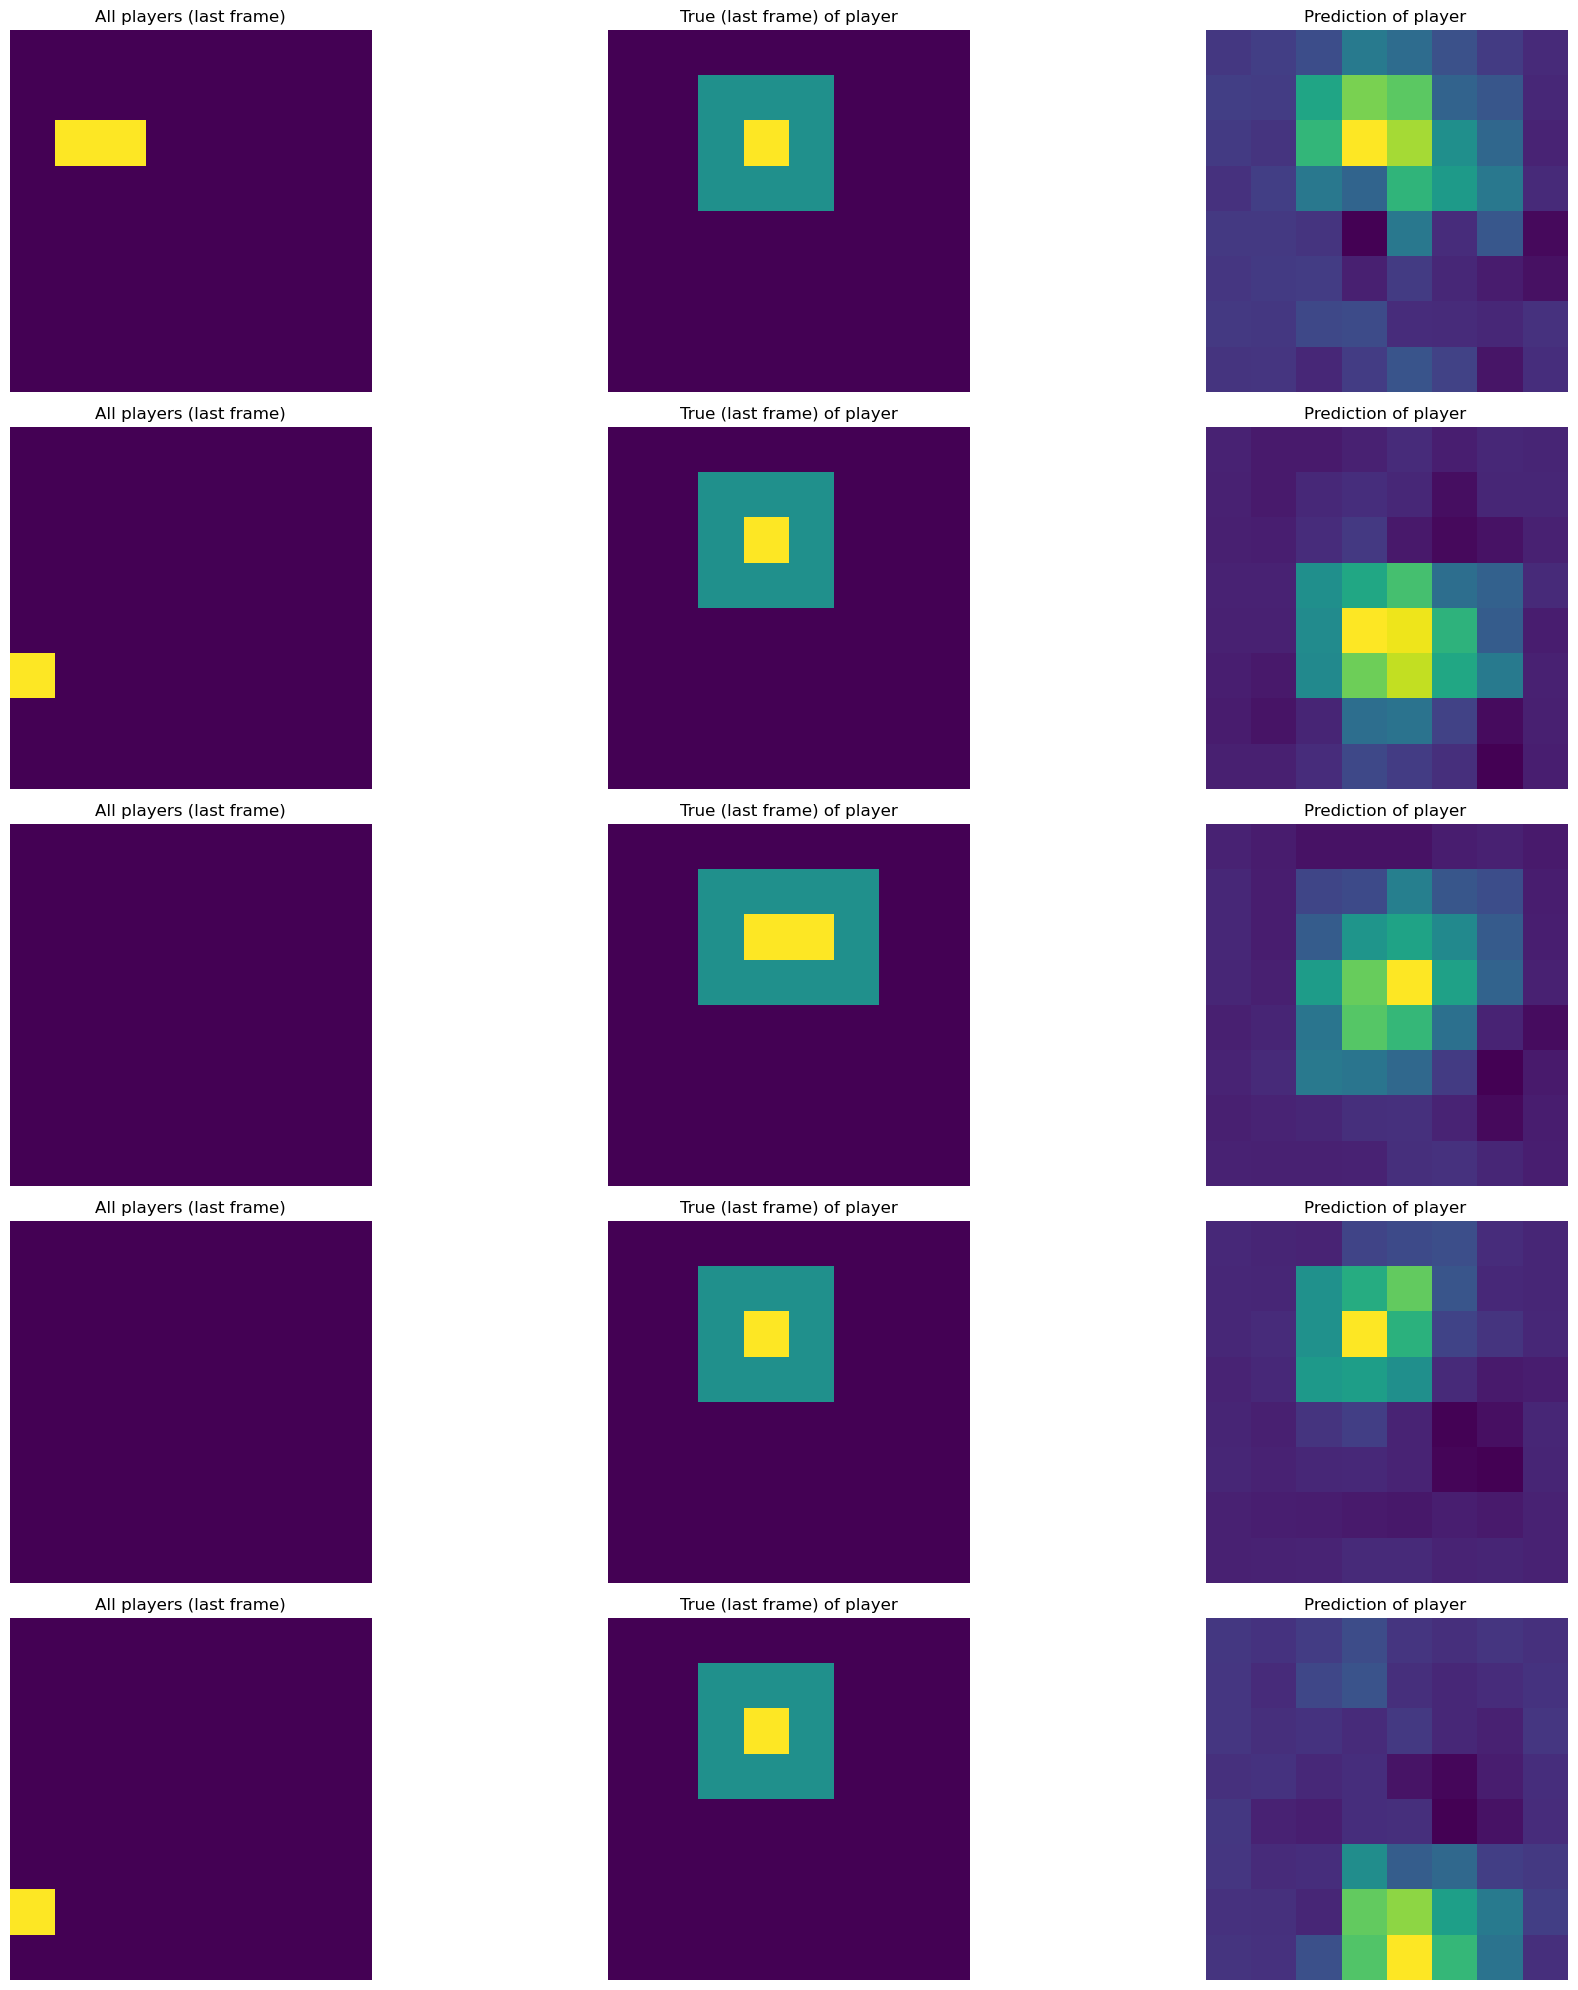

MODELO model1 - ESCENA Scene1
Epoch 1/50
14/14 [==============================] - 2s 61ms/step - loss: 0.0376 - mse: 0.0376 - mae: 0.0948 - val_loss: 0.0371 - val_mse: 0.0371 - val_mae: 0.1130
Epoch 2/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0300 - mse: 0.0300 - mae: 0.0958 - val_loss: 0.0364 - val_mse: 0.0364 - val_mae: 0.1119
Epoch 3/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0263 - mse: 0.0263 - mae: 0.0908 - val_loss: 0.0402 - val_mse: 0.0402 - val_mae: 0.1109
Epoch 4/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.0864 - val_loss: 0.0382 - val_mse: 0.0382 - val_mae: 0.1063
Epoch 5/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.0822 - val_loss: 0.0373 - val_mse: 0.0373 - val_mae: 0.1043
Epoch 6/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.0795 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae:

3/3 [==============================] - 1s 7ms/step


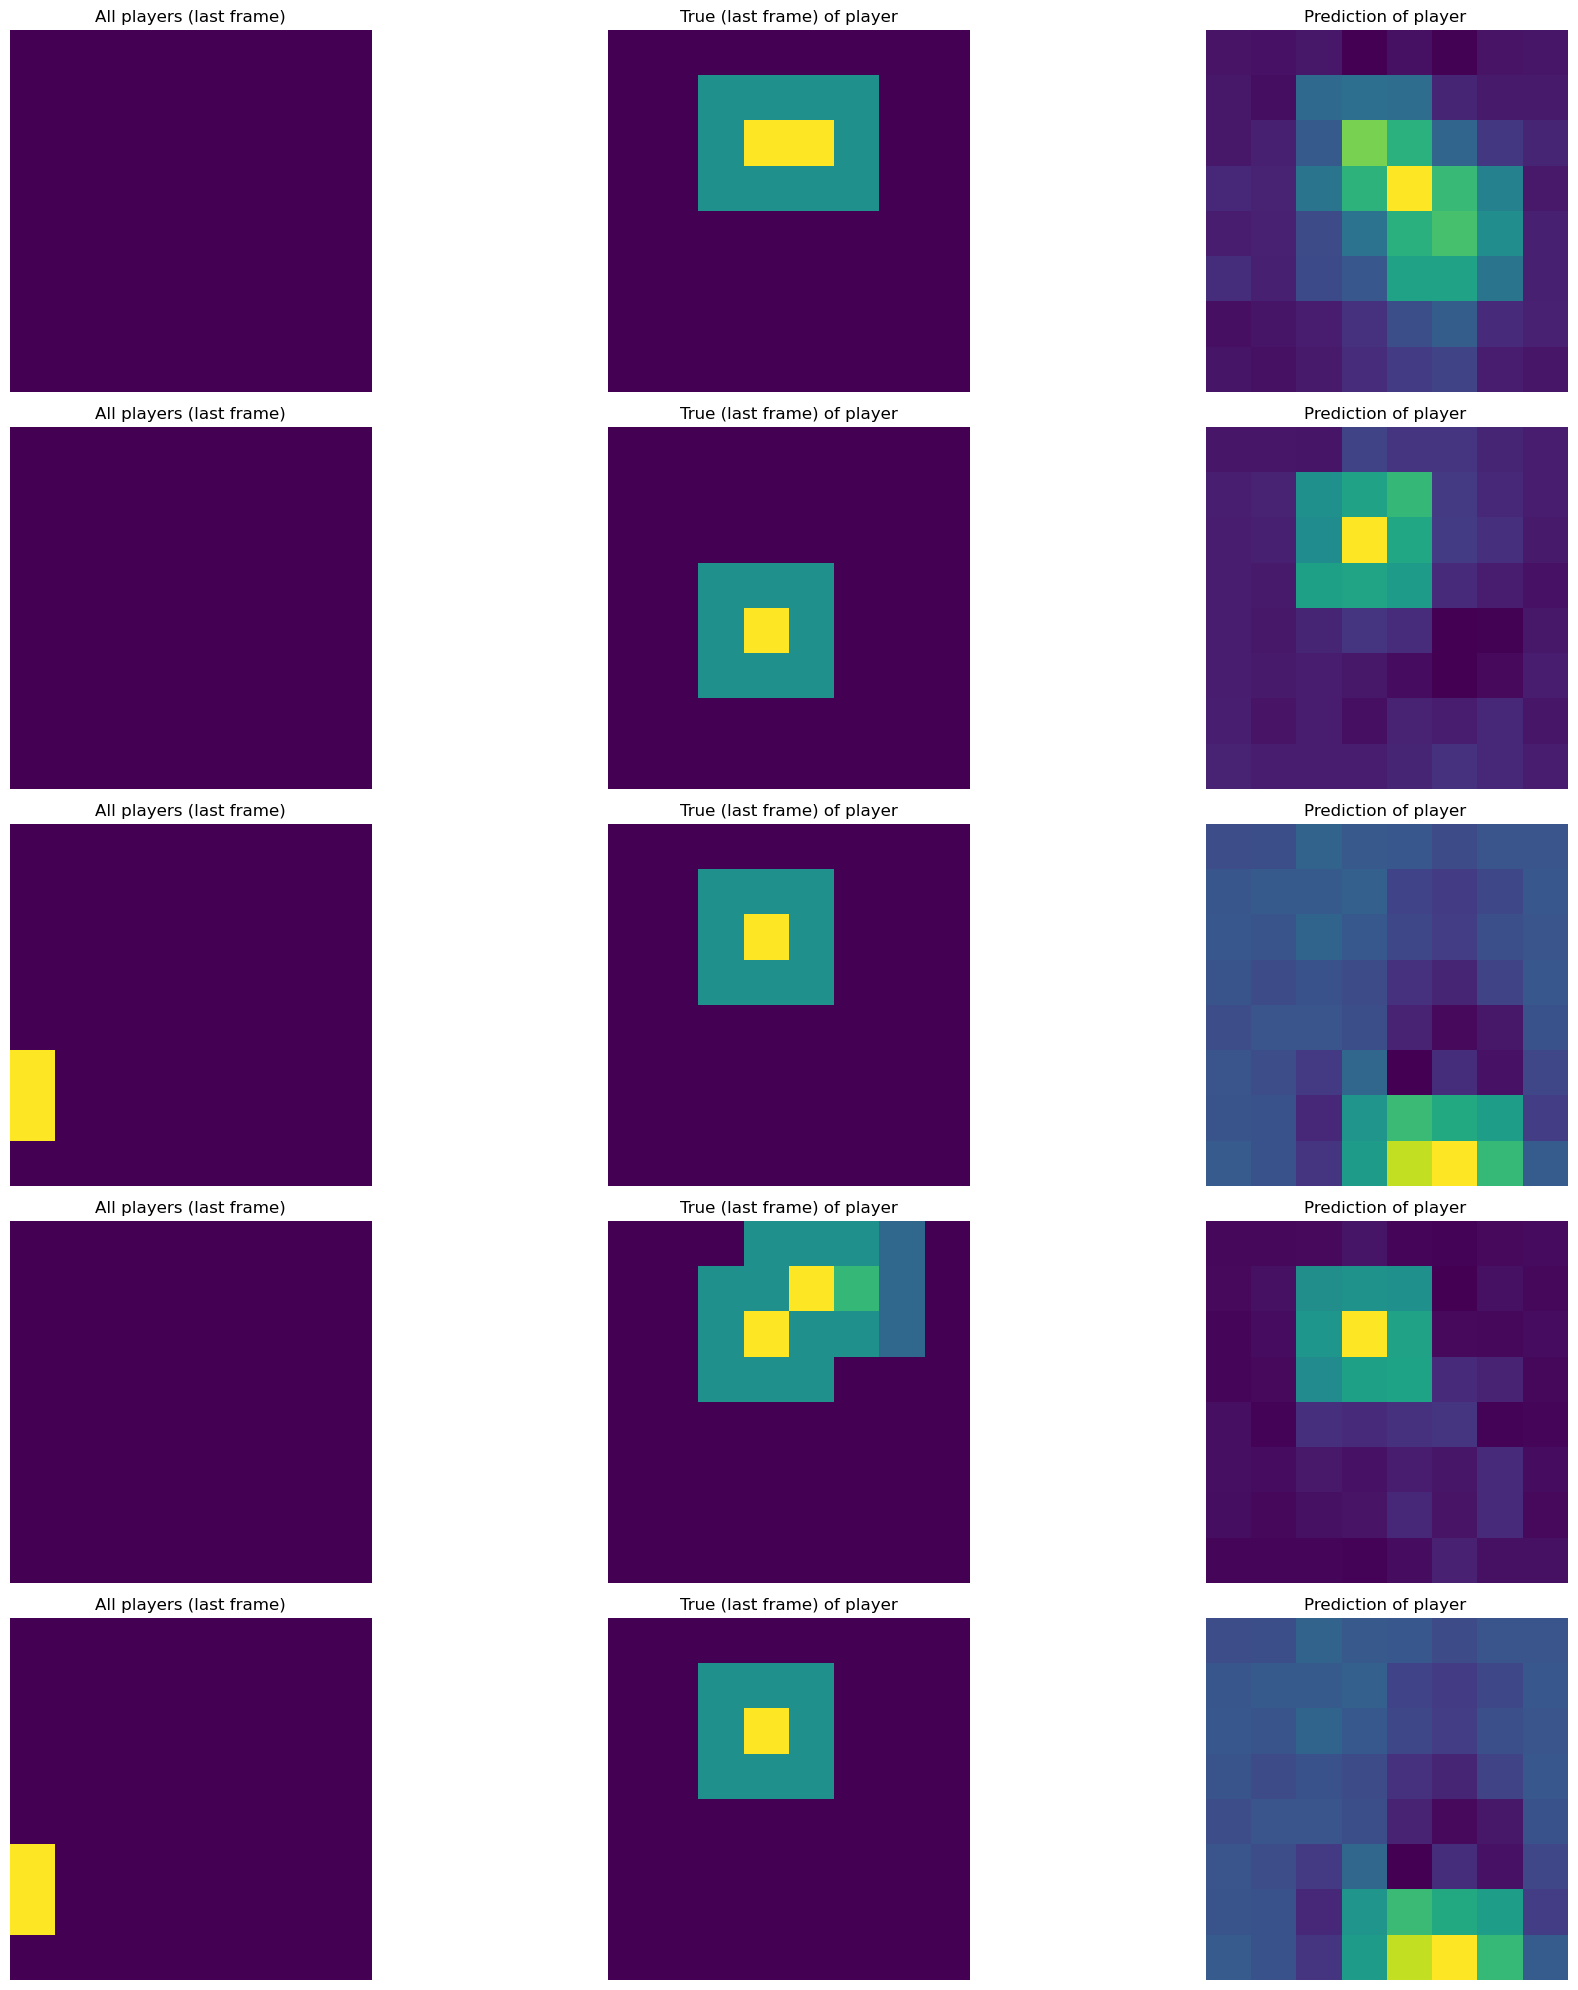

MODELO model2 - ESCENA Scene1
Epoch 1/50
14/14 [==============================] - 3s 86ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.0964 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1050
Epoch 2/50
14/14 [==============================] - 1s 41ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1043 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1043
Epoch 3/50
14/14 [==============================] - 1s 39ms/step - loss: 0.0293 - mse: 0.0293 - mae: 0.0974 - val_loss: 0.0352 - val_mse: 0.0352 - val_mae: 0.1084
Epoch 4/50
14/14 [==============================] - 1s 40ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.0879 - val_loss: 0.0375 - val_mse: 0.0375 - val_mae: 0.1080
Epoch 5/50
14/14 [==============================] - 1s 41ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.0817 - val_loss: 0.0344 - val_mse: 0.0344 - val_mae: 0.1017
Epoch 6/50
14/14 [==============================] - 1s 40ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0794 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae:

3/3 [==============================] - 1s 10ms/step


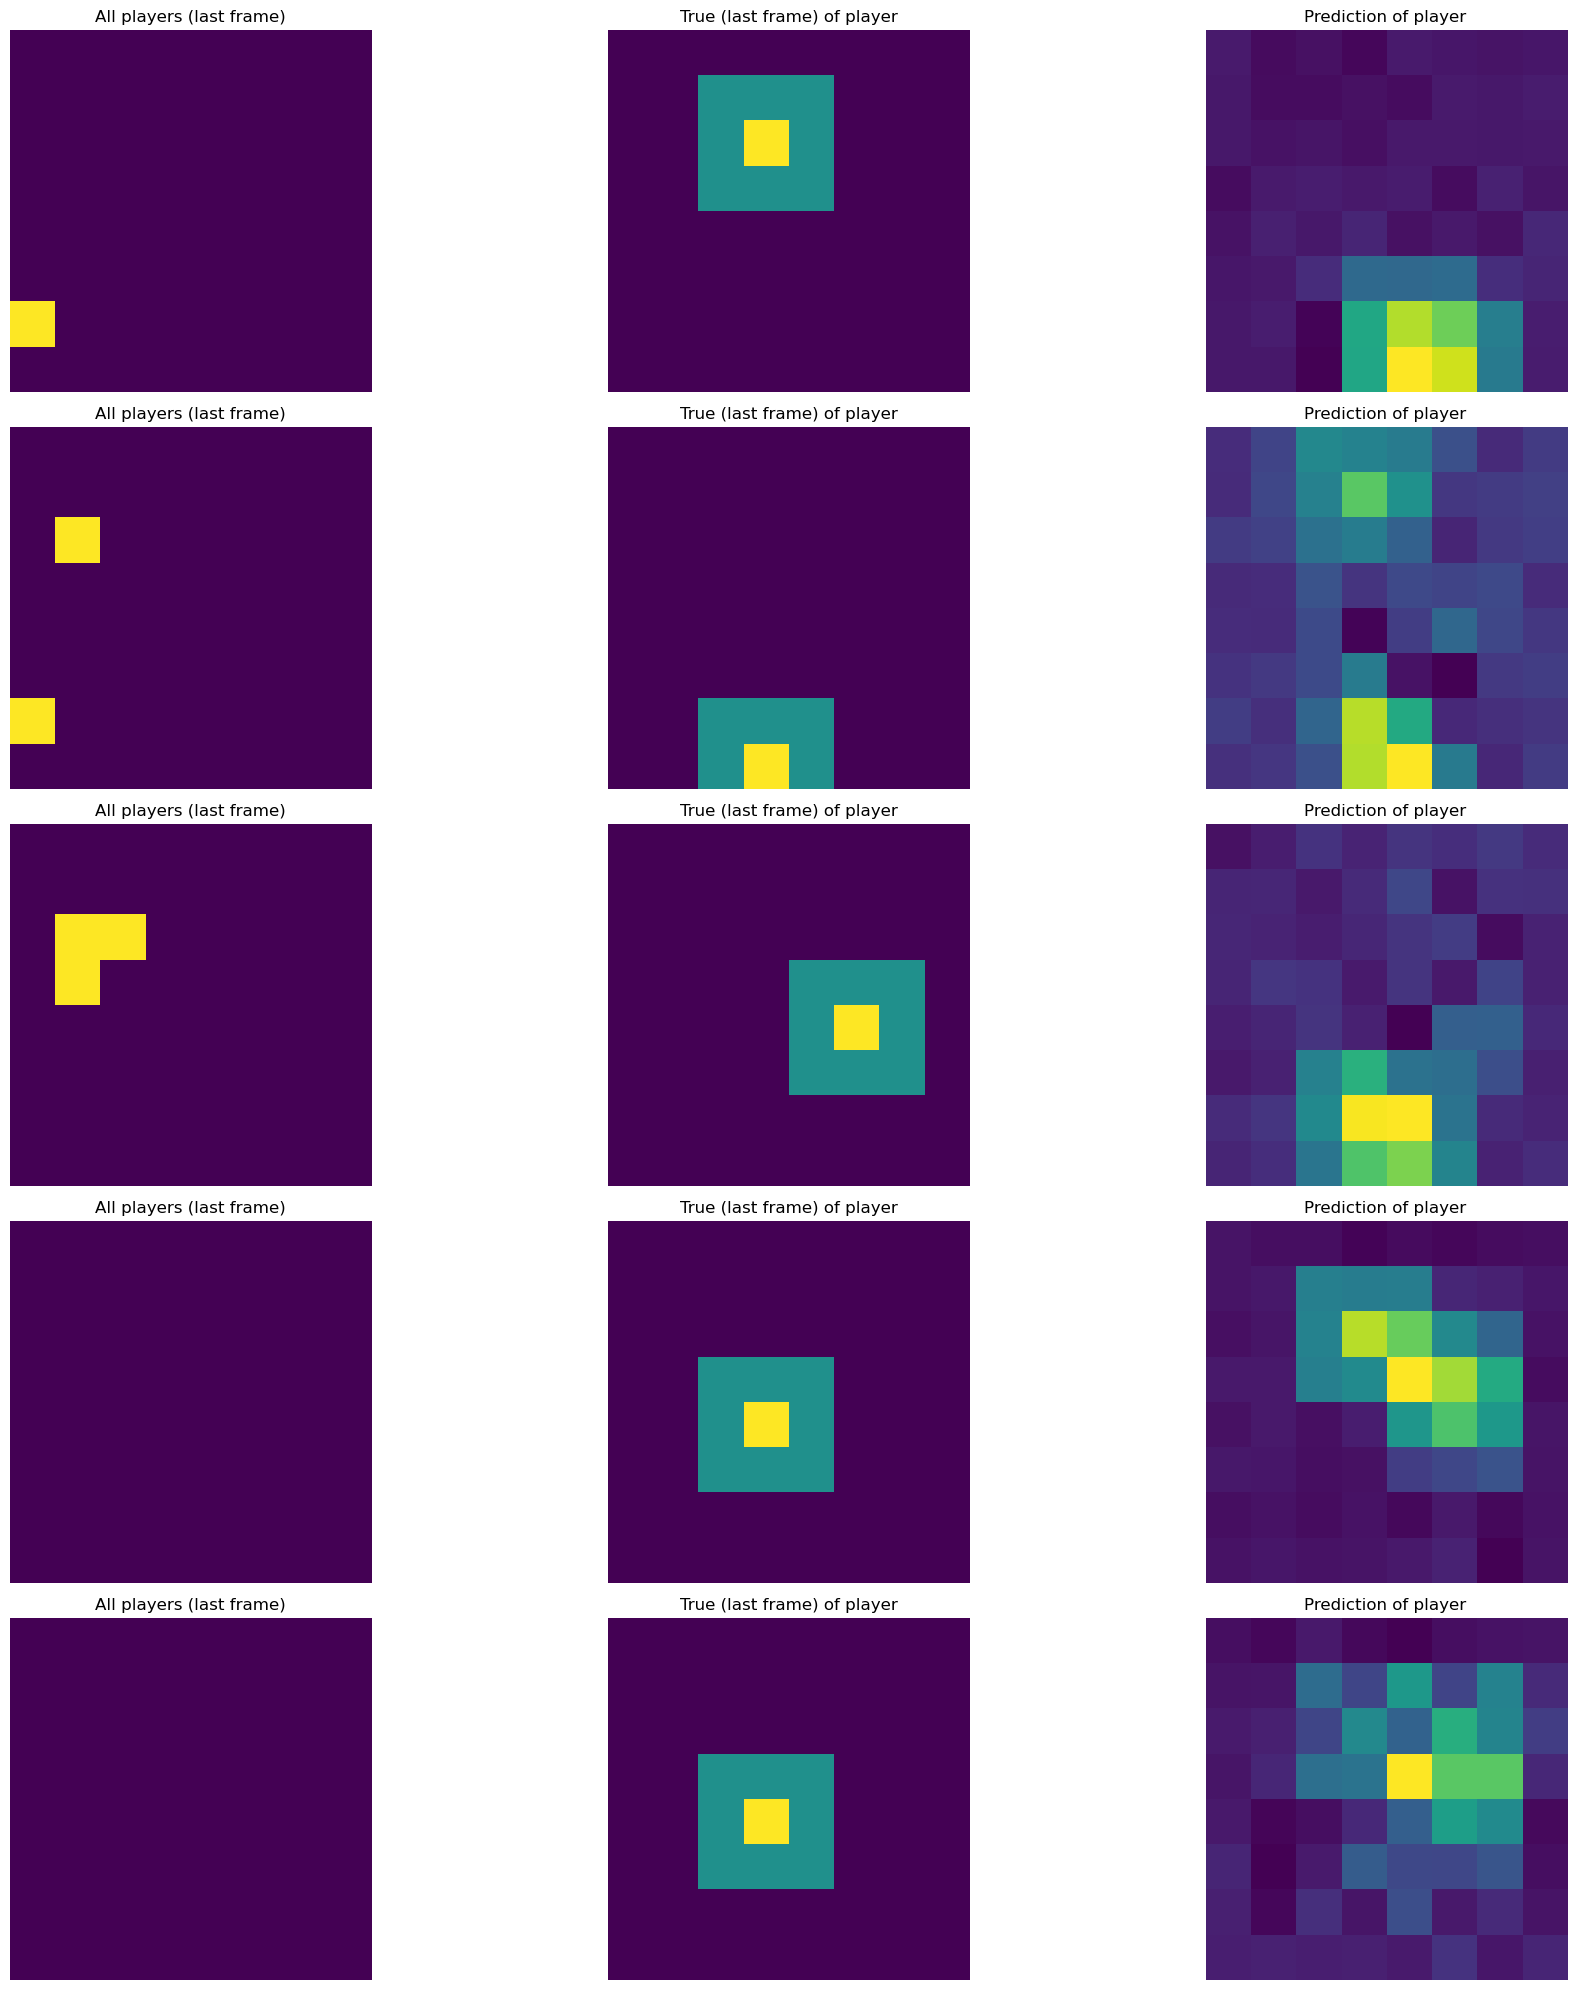

MODELO transf1 - ESCENA Scene1
Epoch 1/50
14/14 [==============================] - 6s 333ms/step - loss: 0.0420 - mse: 0.0420 - mae: 0.1317 - val_loss: 0.0382 - val_mse: 0.0382 - val_mae: 0.1170
Epoch 2/50
14/14 [==============================] - 4s 271ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1107 - val_loss: 0.0376 - val_mse: 0.0376 - val_mae: 0.1117
Epoch 3/50
14/14 [==============================] - 4s 270ms/step - loss: 0.0289 - mse: 0.0289 - mae: 0.1029 - val_loss: 0.0356 - val_mse: 0.0356 - val_mae: 0.1094
Epoch 4/50
14/14 [==============================] - 4s 269ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.0923 - val_loss: 0.0377 - val_mse: 0.0377 - val_mae: 0.1143
Epoch 5/50
14/14 [==============================] - 4s 268ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0883 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1060
Epoch 6/50
14/14 [==============================] - 4s 268ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.0835 - val_loss: 0.0362 - val_mse: 0.0362 - v

3/3 [==============================] - 2s 467ms/step


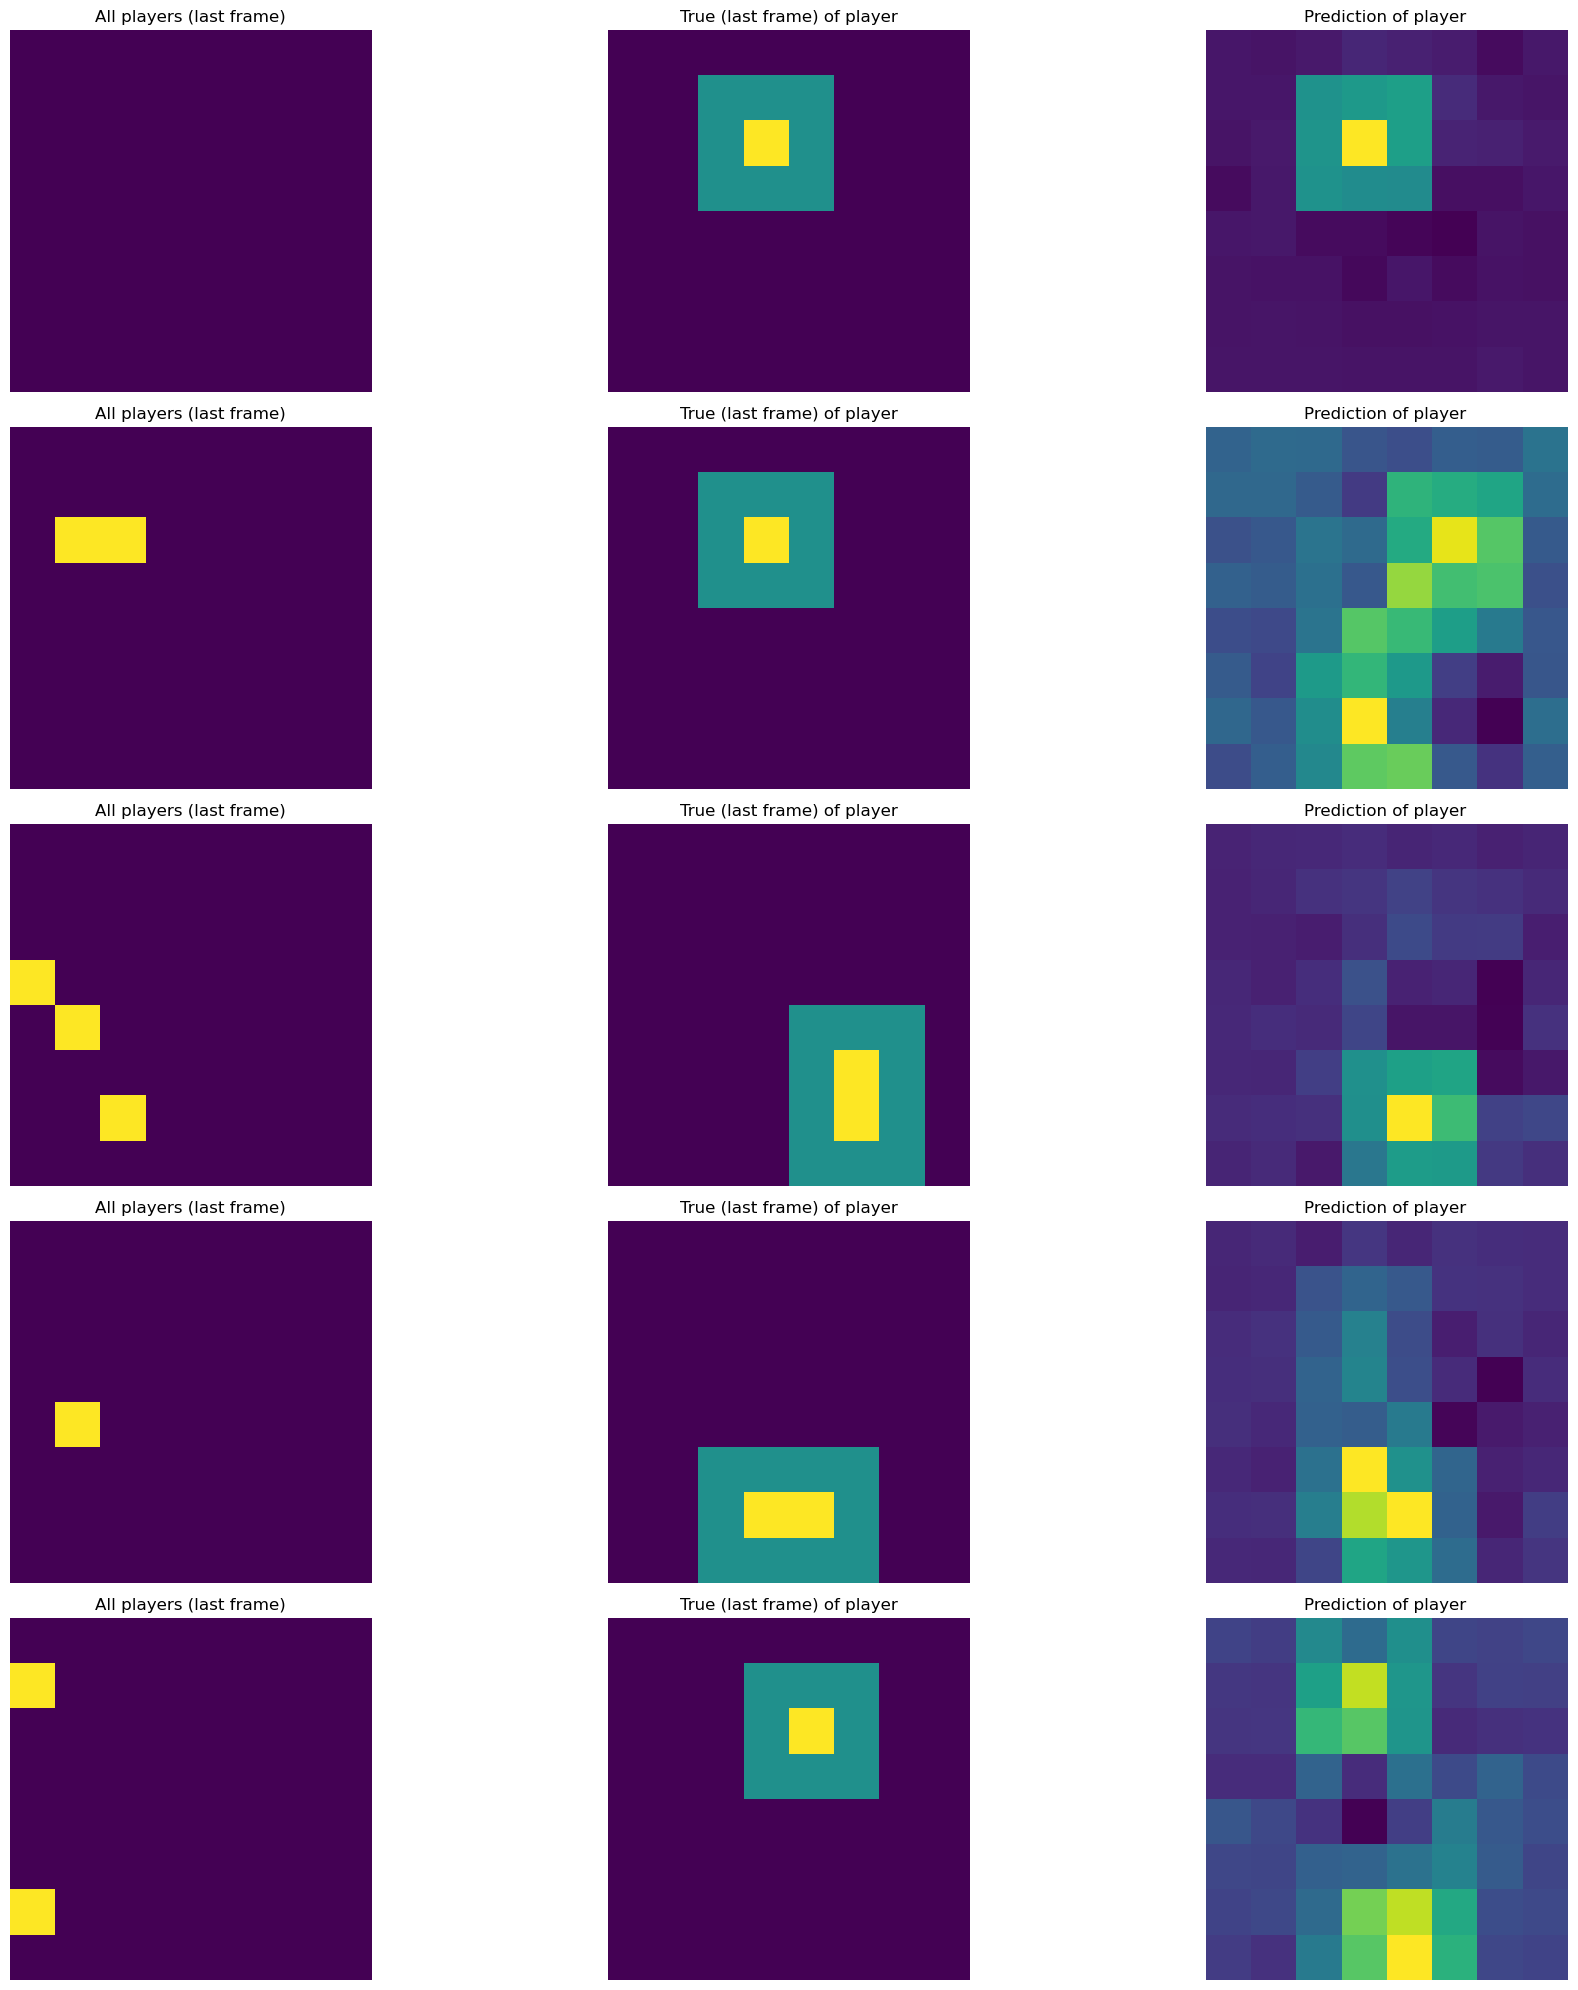

MODELO model0 - ESCENA Scene2
Epoch 1/50
11/11 [==============================] - 7s 159ms/step - loss: 0.0456 - mse: 0.0456 - mae: 0.0876 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.0912
Epoch 2/50
11/11 [==============================] - 1s 88ms/step - loss: 0.0374 - mse: 0.0374 - mae: 0.1153 - val_loss: 0.0320 - val_mse: 0.0320 - val_mae: 0.1124
Epoch 3/50
11/11 [==============================] - 1s 87ms/step - loss: 0.0338 - mse: 0.0338 - mae: 0.1097 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1048
Epoch 4/50
11/11 [==============================] - 1s 86ms/step - loss: 0.0334 - mse: 0.0334 - mae: 0.1086 - val_loss: 0.0312 - val_mse: 0.0312 - val_mae: 0.1080
Epoch 5/50
11/11 [==============================] - 1s 83ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1084 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1017
Epoch 6/50
11/11 [==============================] - 1s 83ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1040 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae

4/4 [==============================] - 1s 28ms/step


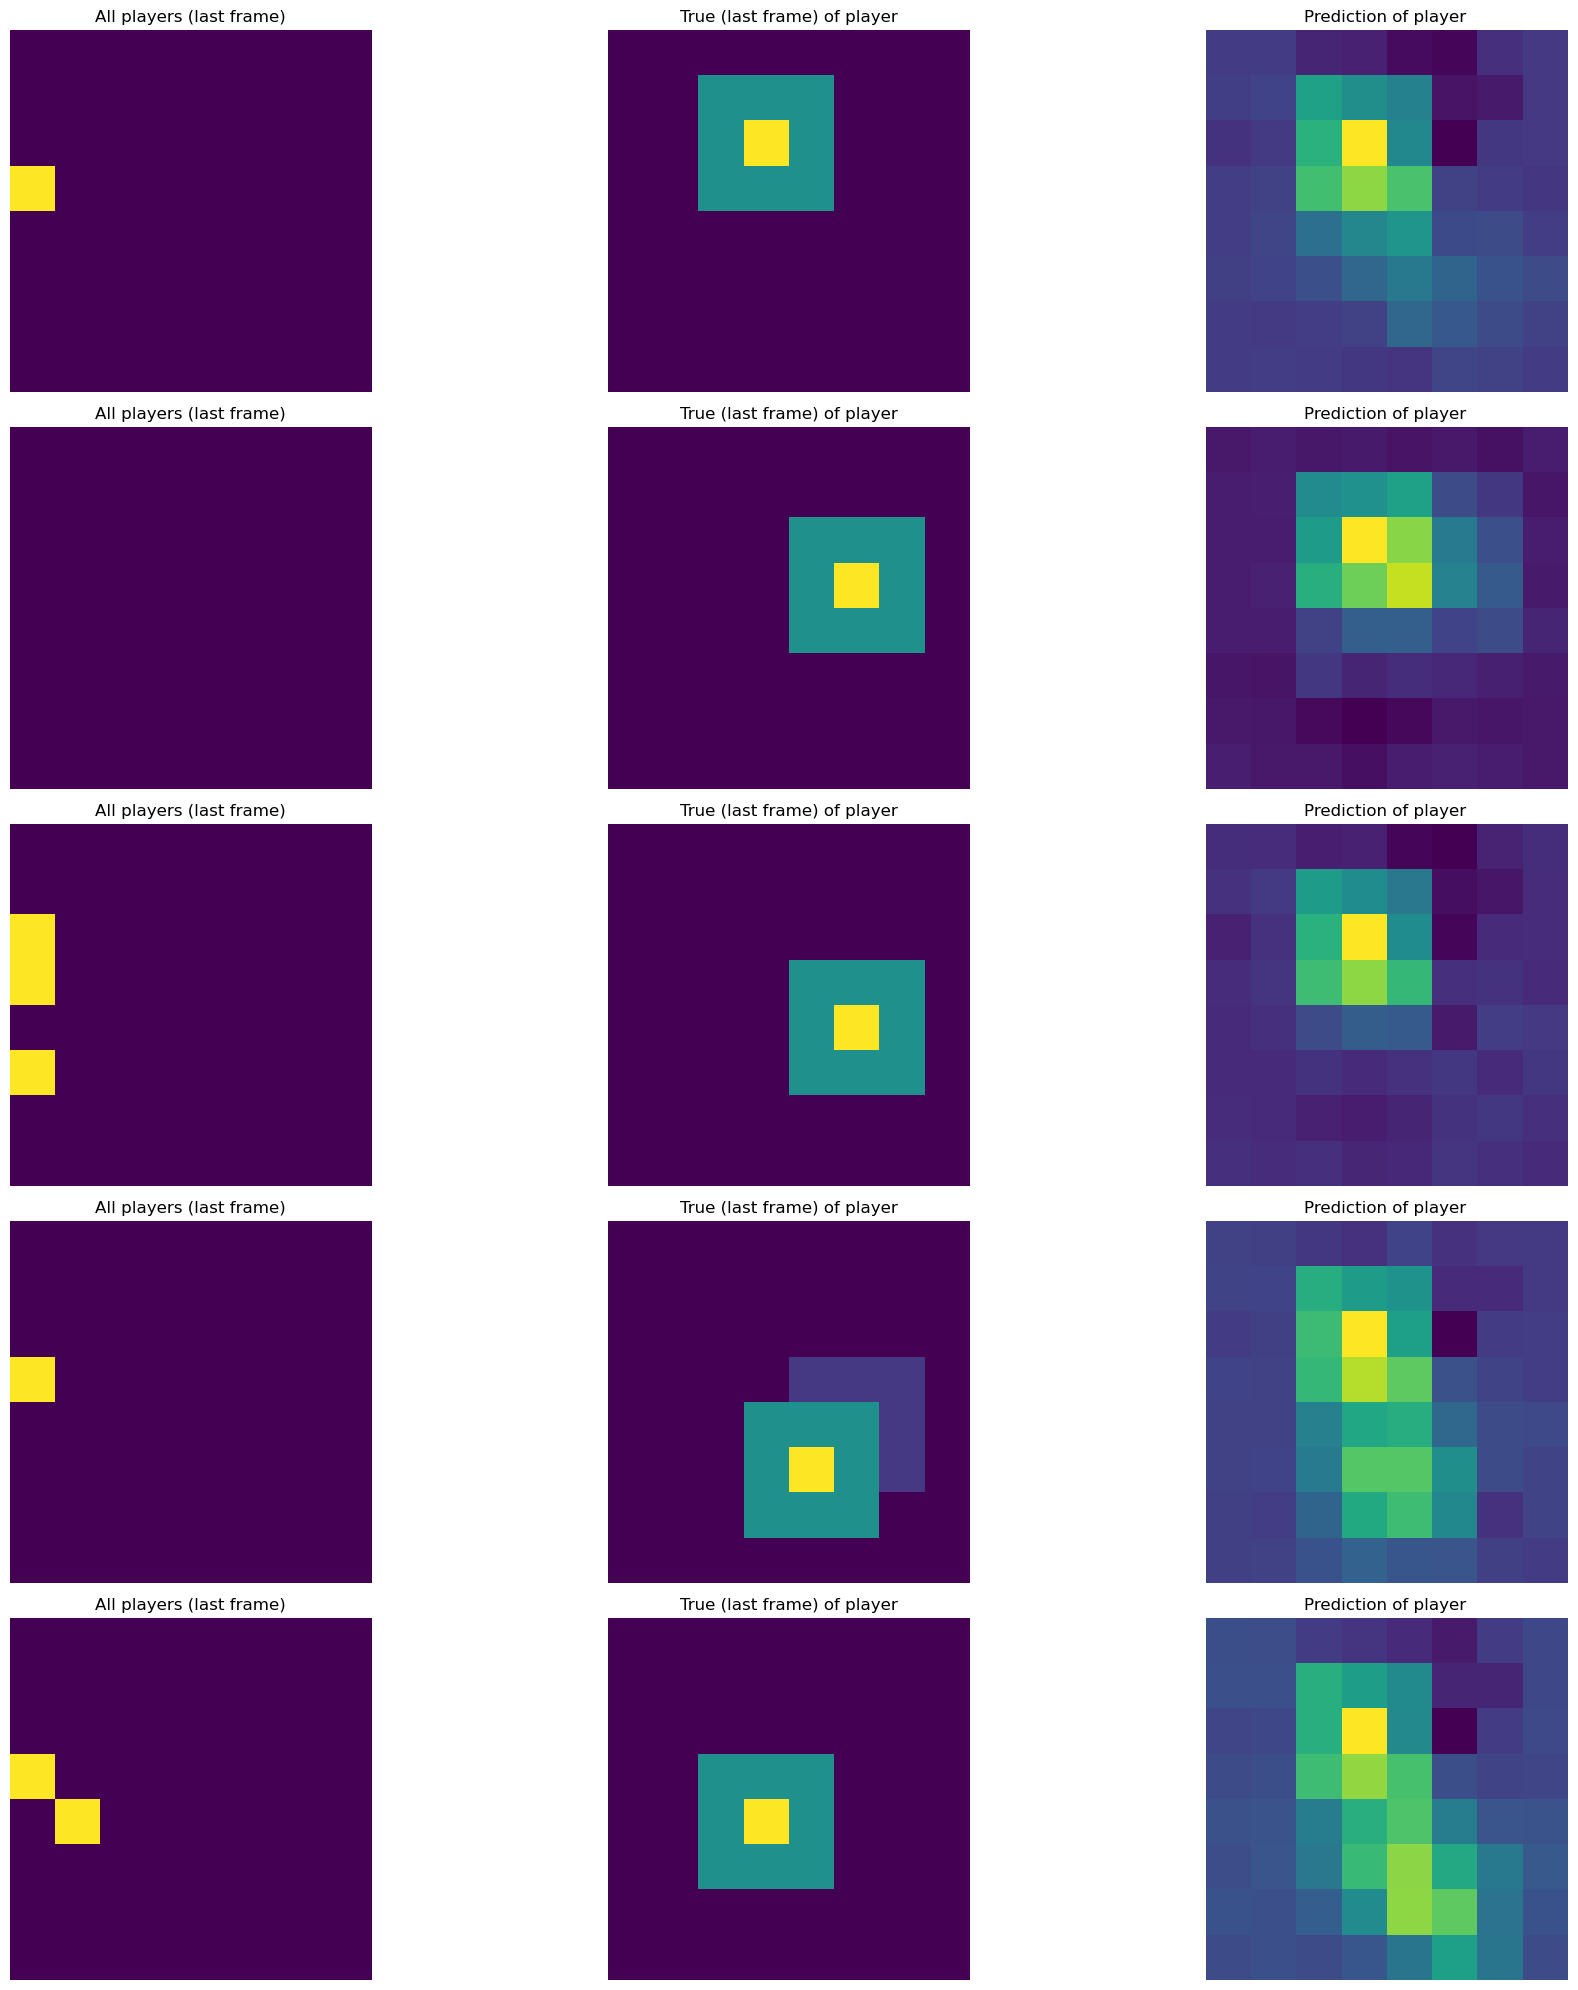

MODELO model1 - ESCENA Scene2
Epoch 1/50
11/11 [==============================] - 3s 146ms/step - loss: 0.0423 - mse: 0.0423 - mae: 0.0964 - val_loss: 0.0317 - val_mse: 0.0317 - val_mae: 0.1083
Epoch 2/50
11/11 [==============================] - 1s 80ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1070 - val_loss: 0.0331 - val_mse: 0.0331 - val_mae: 0.1066
Epoch 3/50
11/11 [==============================] - 1s 78ms/step - loss: 0.0289 - mse: 0.0289 - mae: 0.0982 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1005
Epoch 4/50
11/11 [==============================] - 1s 79ms/step - loss: 0.0271 - mse: 0.0271 - mae: 0.0929 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.0964
Epoch 5/50
11/11 [==============================] - 1s 76ms/step - loss: 0.0259 - mse: 0.0259 - mae: 0.0899 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.1007
Epoch 6/50
11/11 [==============================] - 1s 76ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0845 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae

4/4 [==============================] - 1s 14ms/step


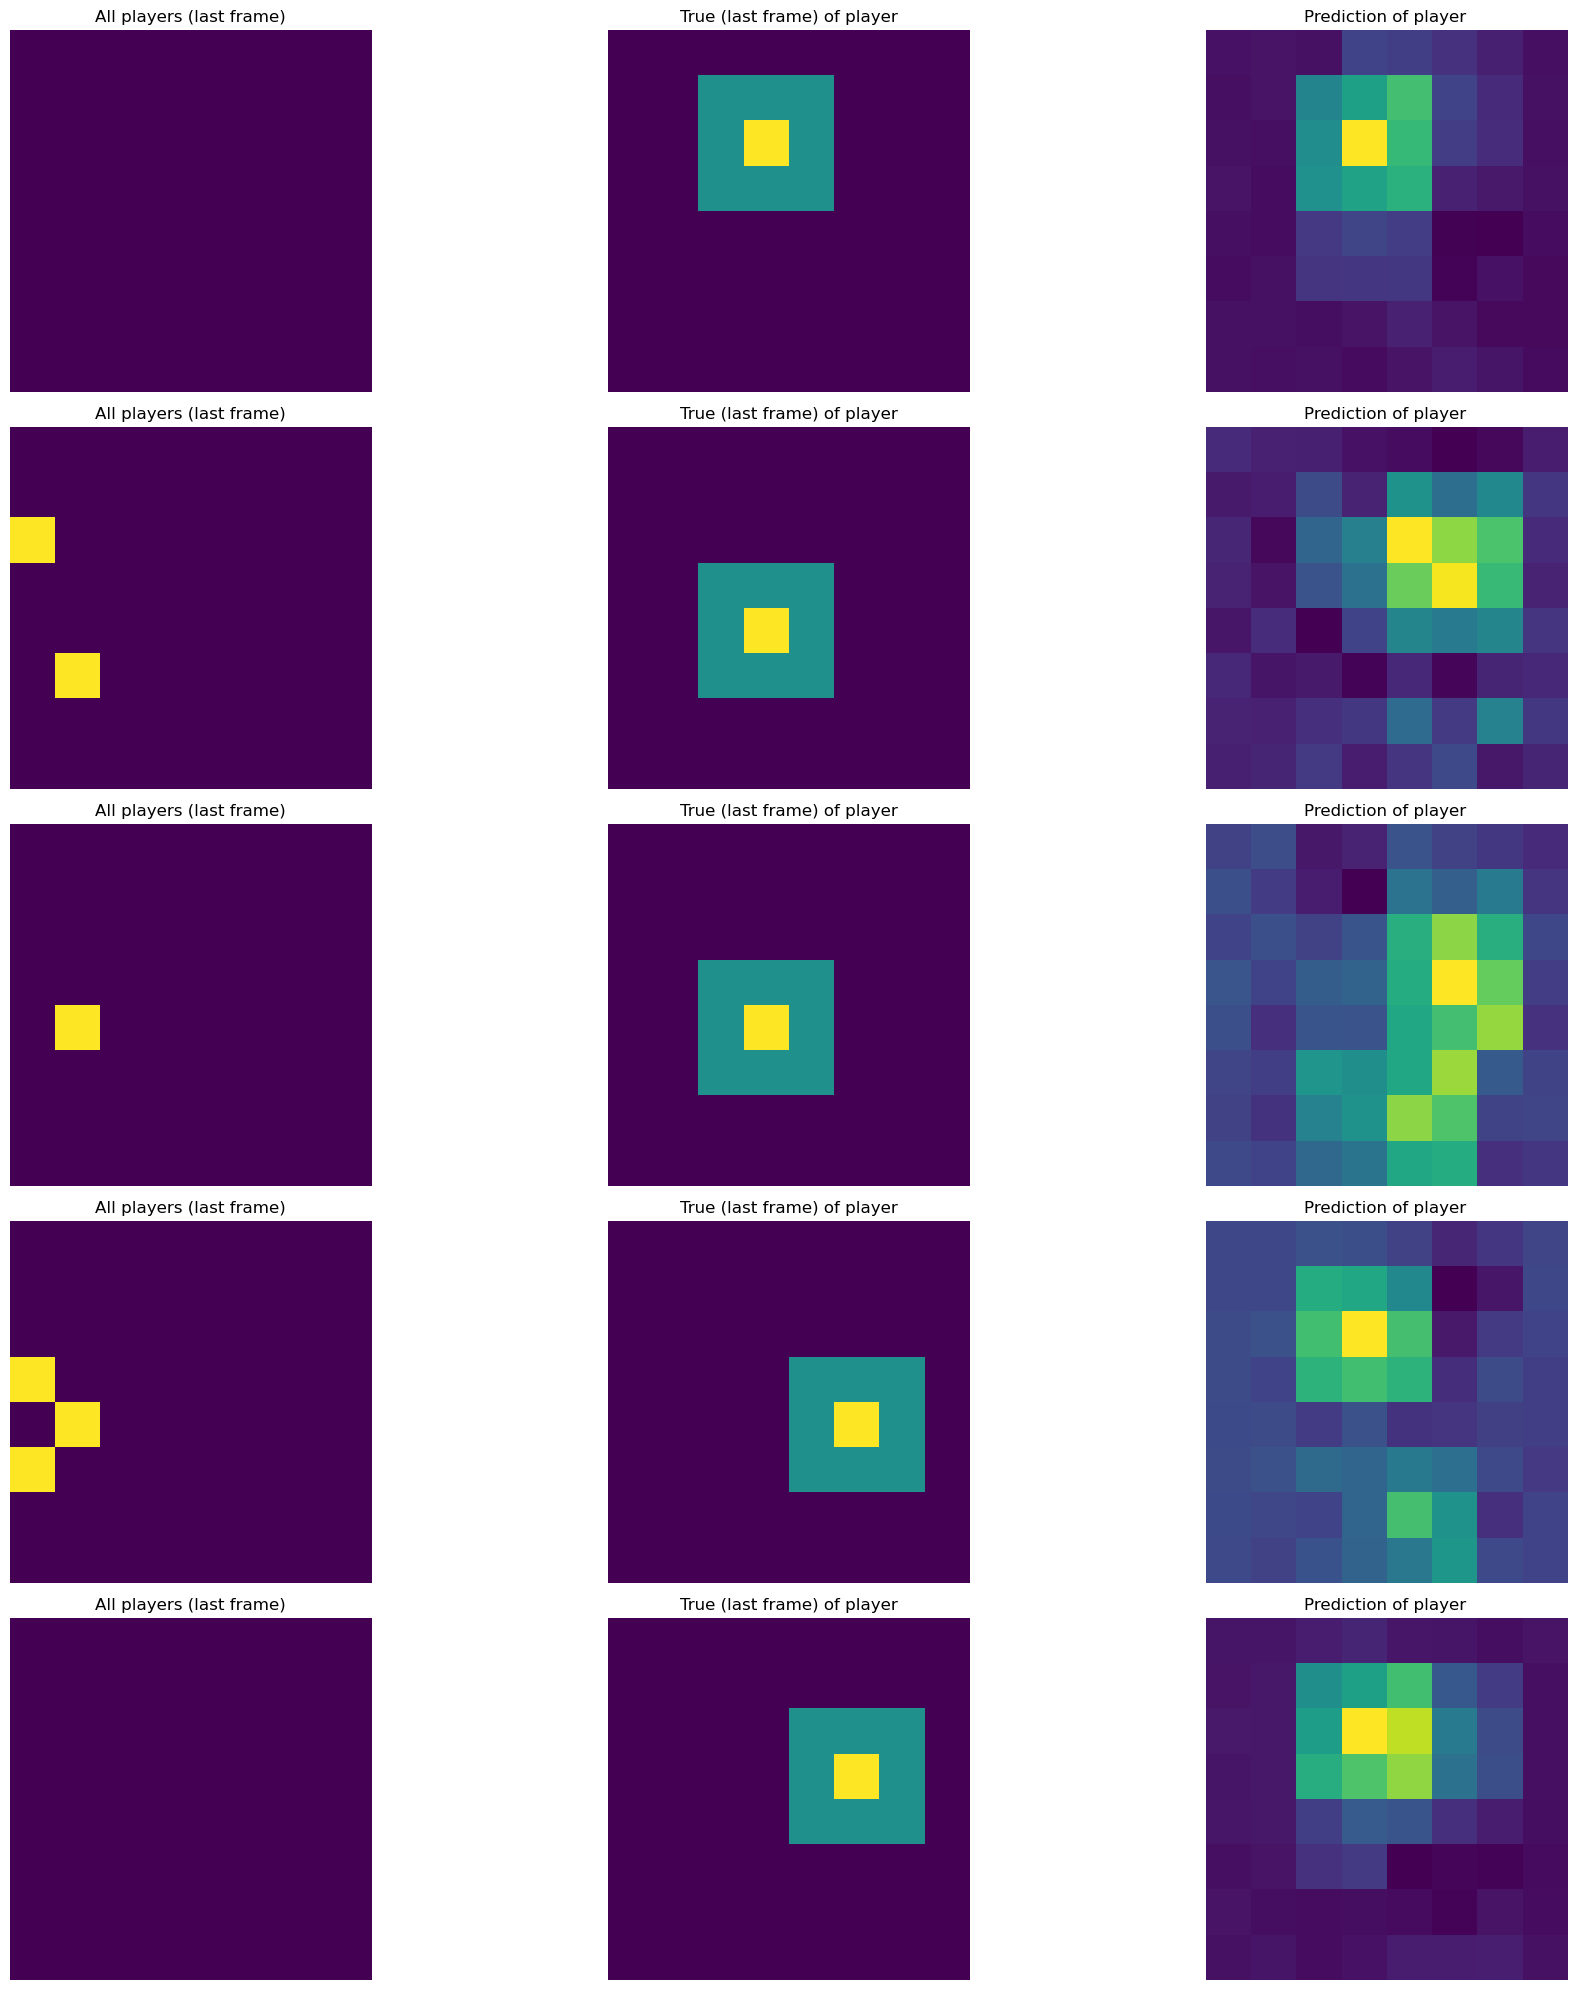

MODELO model2 - ESCENA Scene2
Epoch 1/50
11/11 [==============================] - 4s 201ms/step - loss: 0.0423 - mse: 0.0423 - mae: 0.0991 - val_loss: 0.0316 - val_mse: 0.0316 - val_mae: 0.1115
Epoch 2/50
11/11 [==============================] - 1s 138ms/step - loss: 0.0343 - mse: 0.0343 - mae: 0.1108 - val_loss: 0.0321 - val_mse: 0.0321 - val_mae: 0.1007
Epoch 3/50
11/11 [==============================] - 1s 138ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1051 - val_loss: 0.0334 - val_mse: 0.0334 - val_mae: 0.1087
Epoch 4/50
11/11 [==============================] - 1s 138ms/step - loss: 0.0286 - mse: 0.0286 - mae: 0.0977 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1114
Epoch 5/50
11/11 [==============================] - 2s 138ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.0912 - val_loss: 0.0369 - val_mse: 0.0369 - val_mae: 0.1092
Epoch 6/50
11/11 [==============================] - 1s 138ms/step - loss: 0.0273 - mse: 0.0273 - mae: 0.0926 - val_loss: 0.0317 - val_mse: 0.0317 - va

4/4 [==============================] - 1s 50ms/step


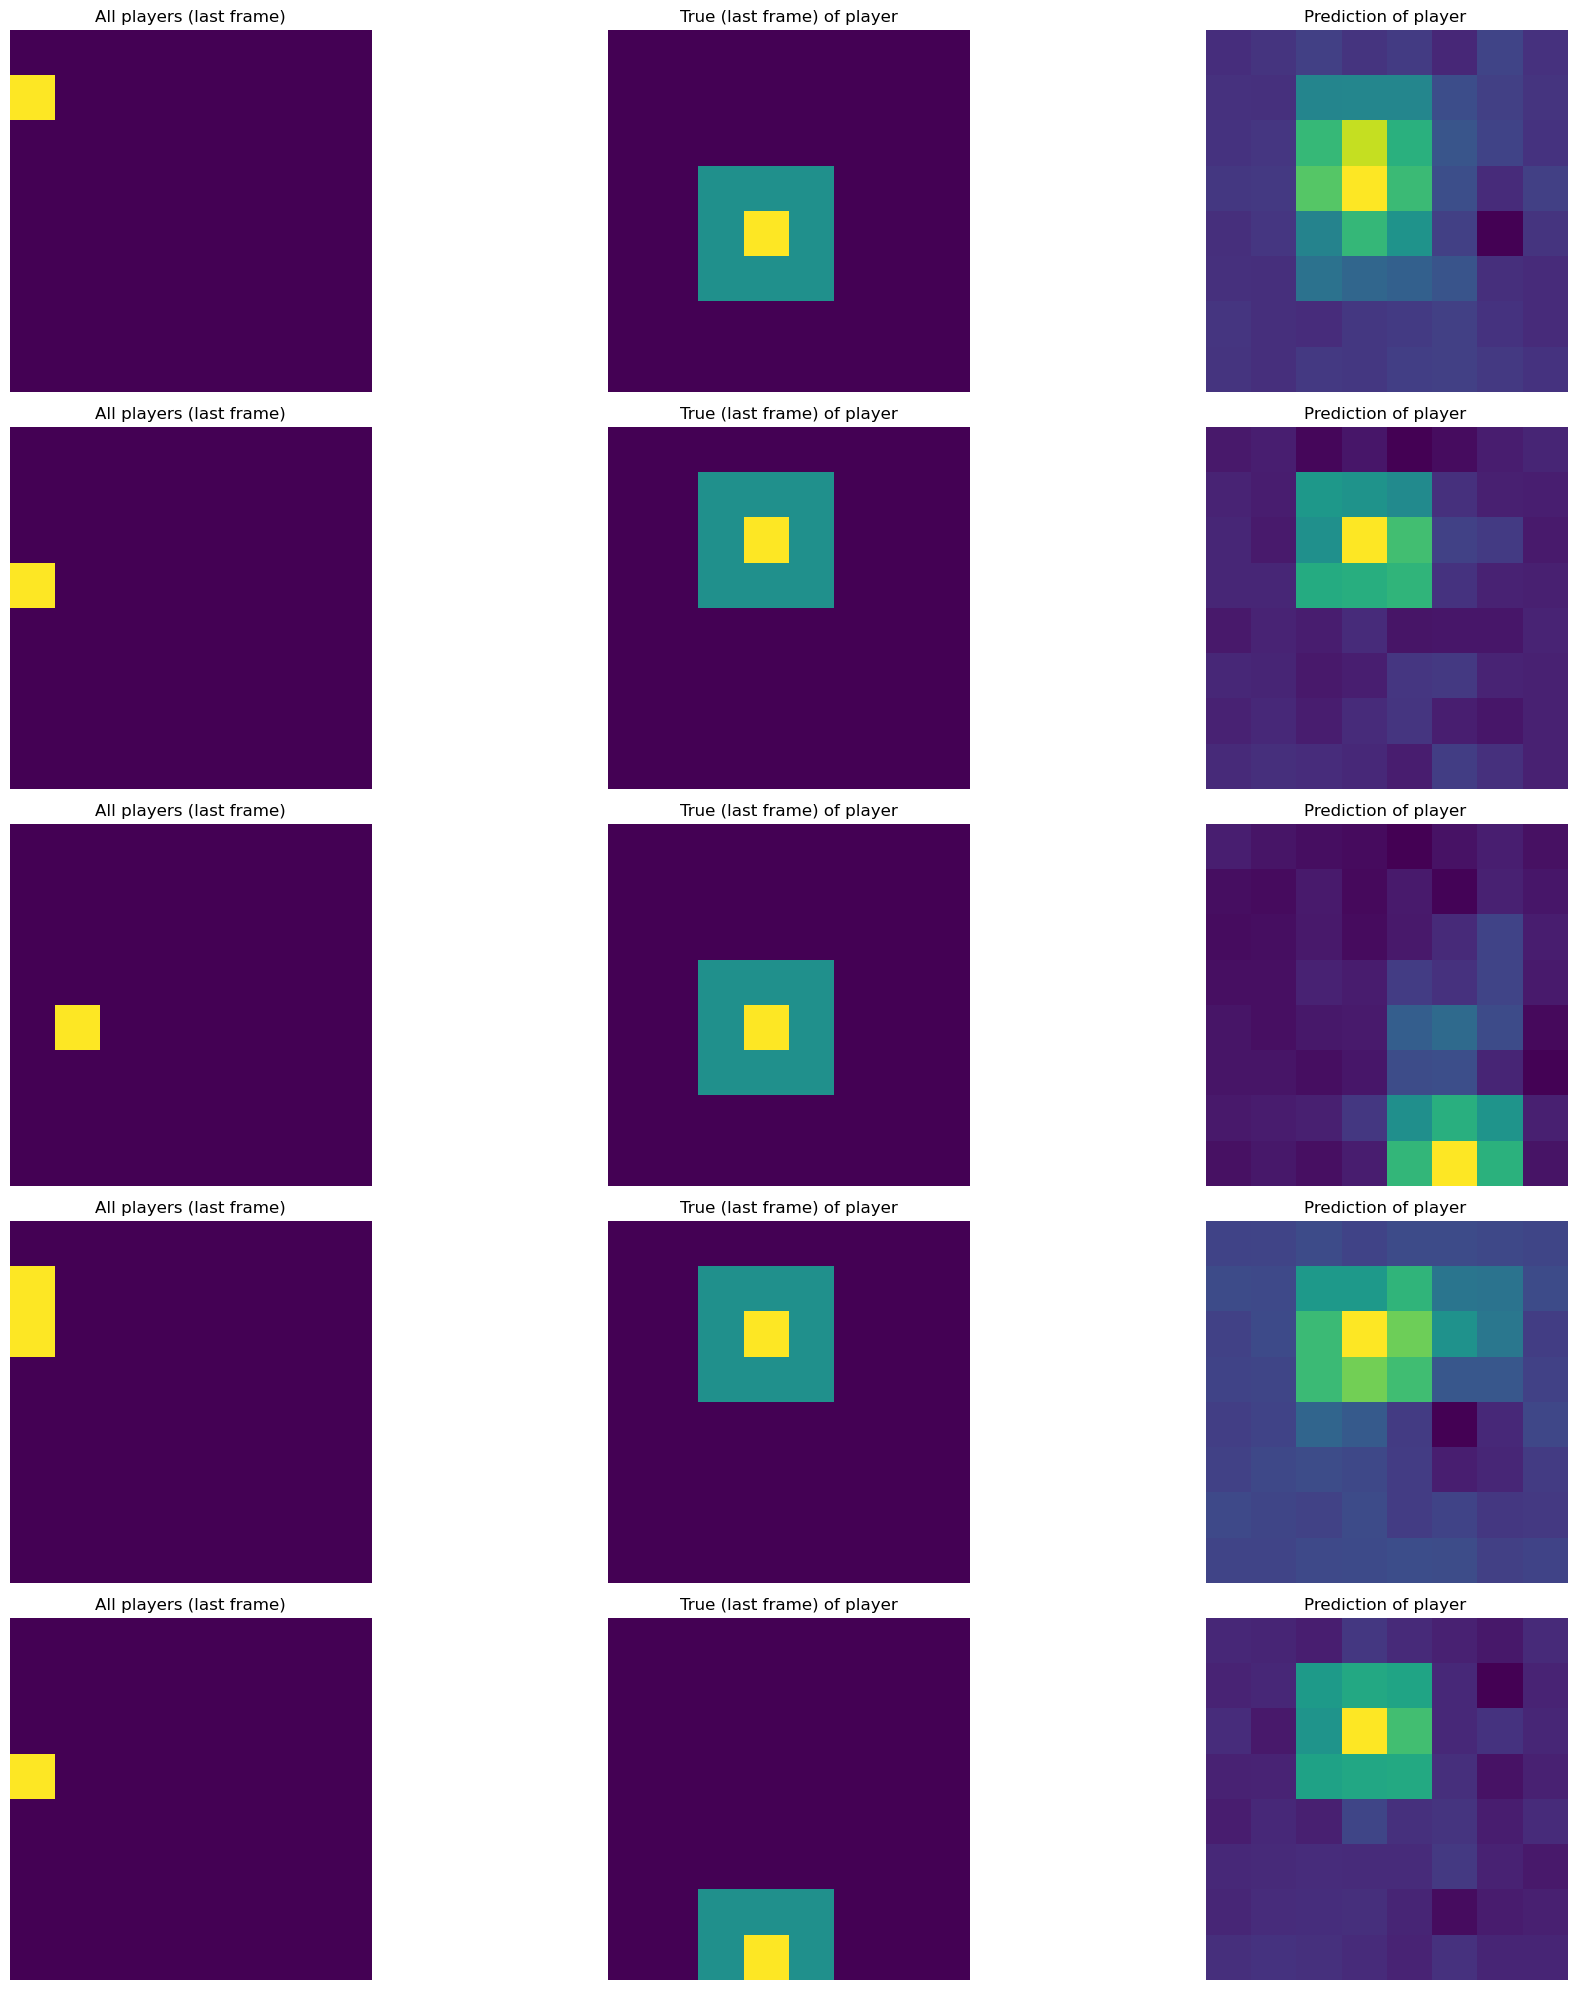

MODELO transf1 - ESCENA Scene2
Epoch 1/50
11/11 [==============================] - 15s 1s/step - loss: 0.0438 - mse: 0.0438 - mae: 0.1356 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1202
Epoch 2/50
11/11 [==============================] - 14s 1s/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1129 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1112
Epoch 3/50
11/11 [==============================] - 14s 1s/step - loss: 0.0298 - mse: 0.0298 - mae: 0.1060 - val_loss: 0.0346 - val_mse: 0.0346 - val_mae: 0.1103
Epoch 4/50
11/11 [==============================] - 14s 1s/step - loss: 0.0271 - mse: 0.0271 - mae: 0.1000 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1095
Epoch 5/50
11/11 [==============================] - 14s 1s/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0922 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1063
Epoch 6/50
11/11 [==============================] - 14s 1s/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0889 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.10

4/4 [==============================] - 3s 647ms/step


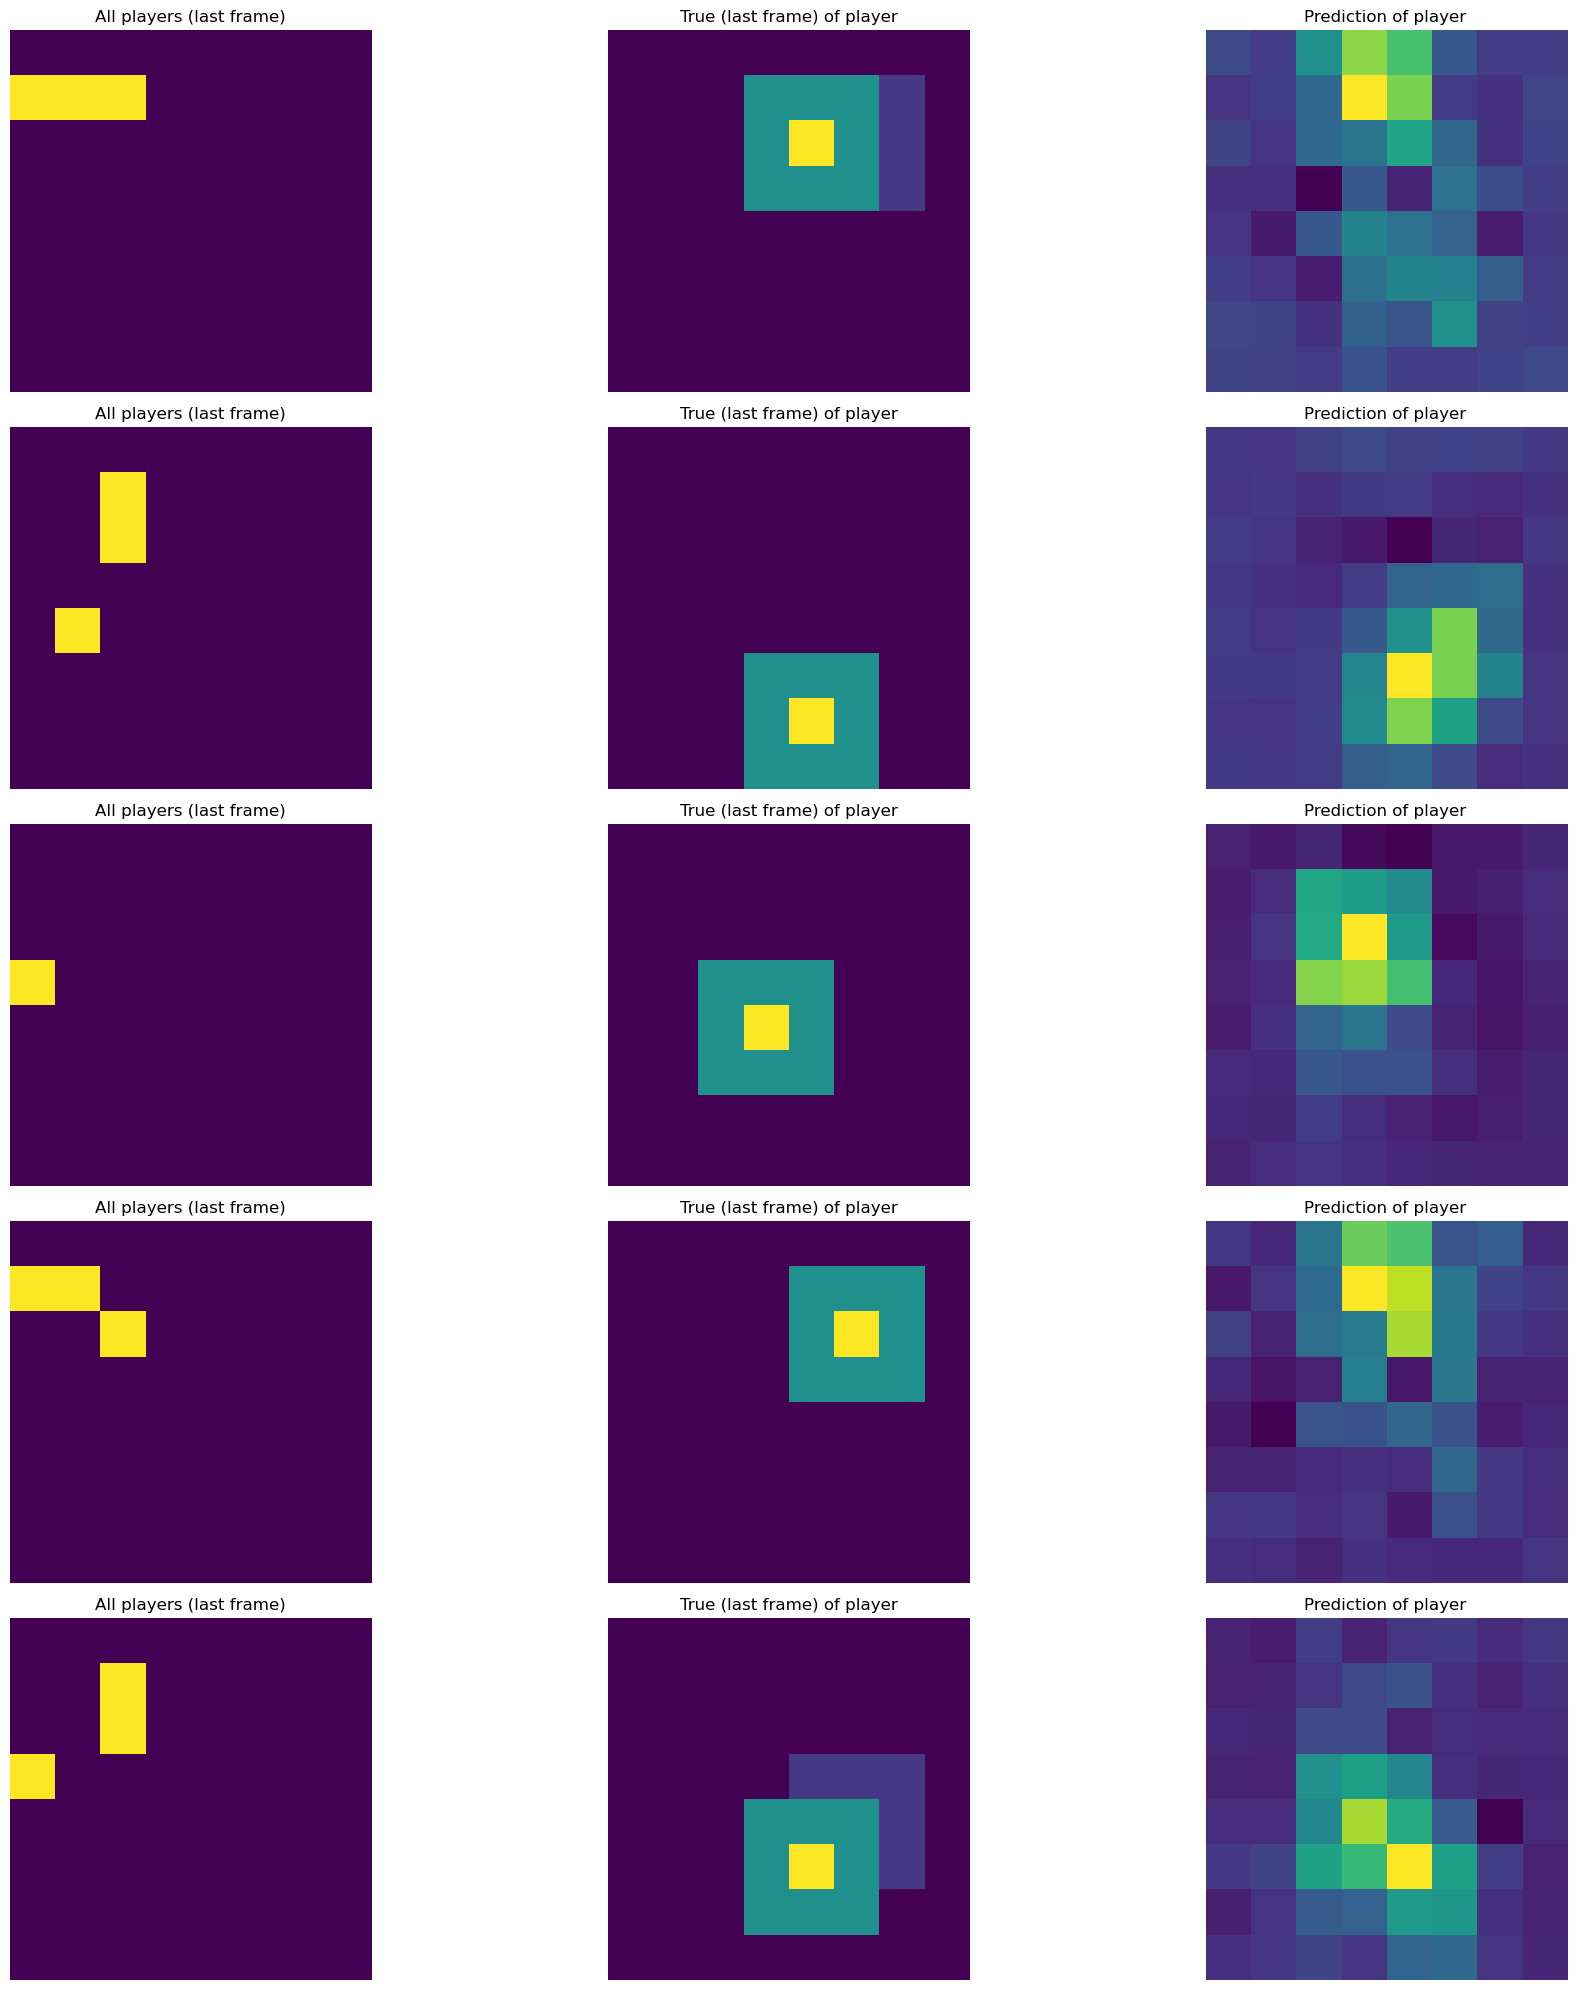

MODELO model0 - ESCENA Scene3
Epoch 1/50
12/12 [==============================] - 8s 240ms/step - loss: 0.0413 - mse: 0.0413 - mae: 0.0820 - val_loss: 0.0402 - val_mse: 0.0402 - val_mae: 0.1036
Epoch 2/50
12/12 [==============================] - 2s 175ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.1104 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1129
Epoch 3/50
12/12 [==============================] - 2s 175ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1030 - val_loss: 0.0346 - val_mse: 0.0346 - val_mae: 0.1081
Epoch 4/50
12/12 [==============================] - 2s 174ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1020 - val_loss: 0.0340 - val_mse: 0.0340 - val_mae: 0.1087
Epoch 5/50
12/12 [==============================] - 2s 174ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1020 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1032
Epoch 6/50
12/12 [==============================] - 2s 175ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.0978 - val_loss: 0.0343 - val_mse: 0.0343 - va

4/4 [==============================] - 1s 60ms/step


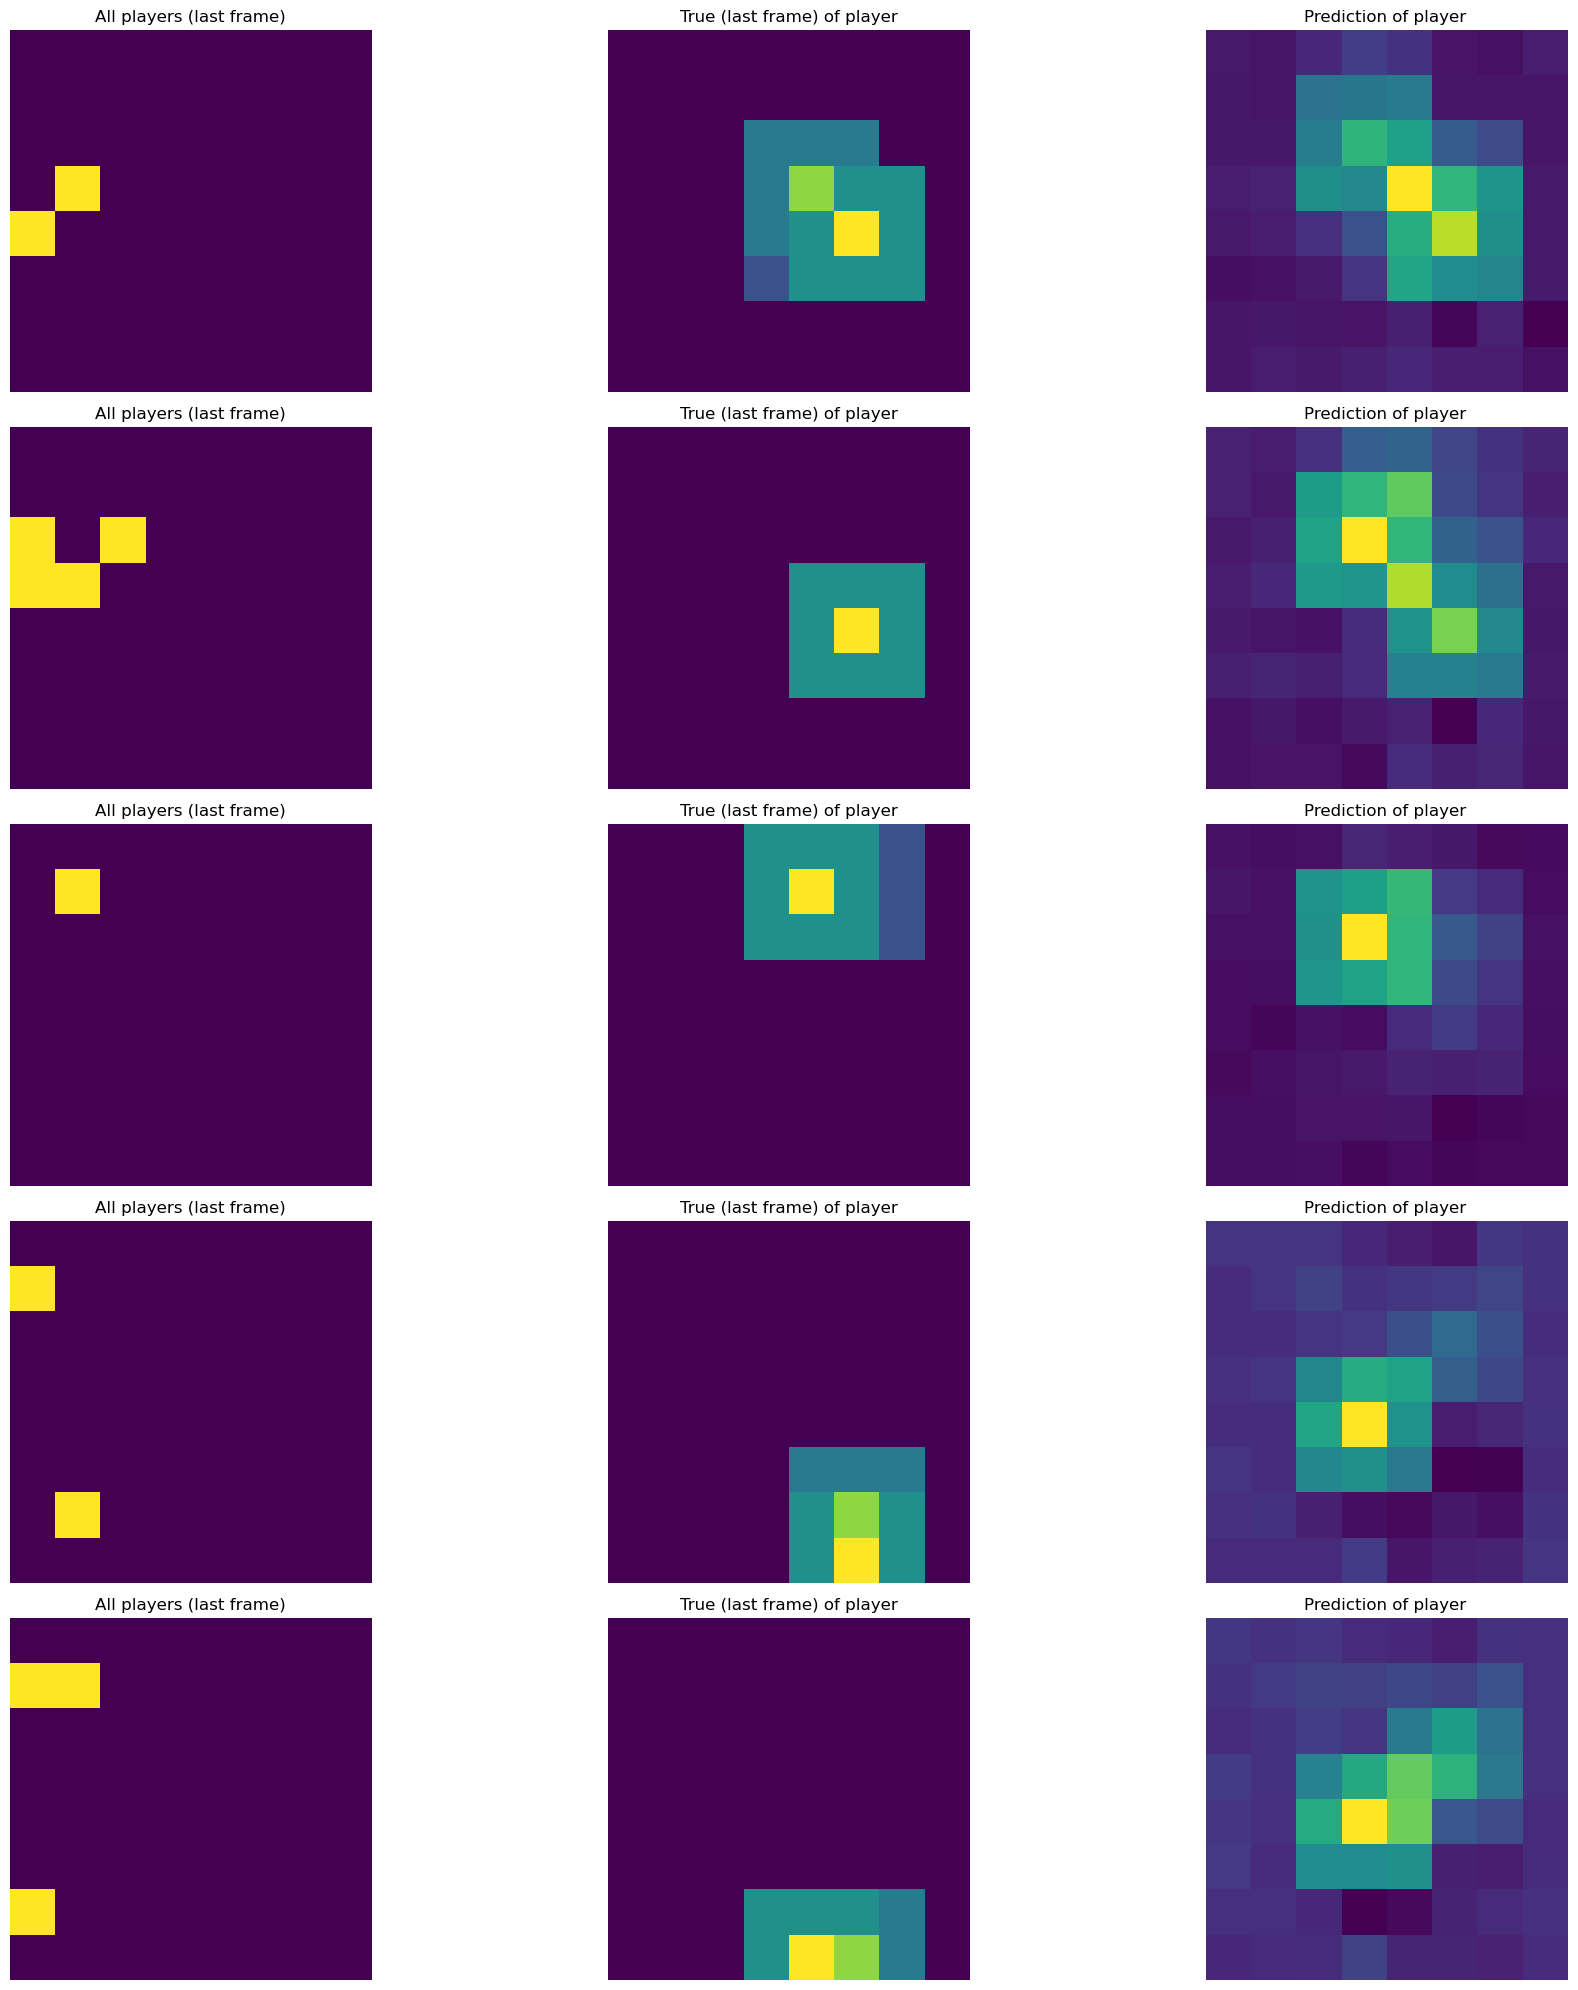

MODELO model1 - ESCENA Scene3
Epoch 1/50
12/12 [==============================] - 3s 151ms/step - loss: 0.0379 - mse: 0.0379 - mae: 0.0892 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.1219
Epoch 2/50
12/12 [==============================] - 1s 97ms/step - loss: 0.0302 - mse: 0.0302 - mae: 0.1005 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1072
Epoch 3/50
12/12 [==============================] - 1s 96ms/step - loss: 0.0270 - mse: 0.0270 - mae: 0.0918 - val_loss: 0.0349 - val_mse: 0.0349 - val_mae: 0.1034
Epoch 4/50
12/12 [==============================] - 1s 96ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.0878 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae: 0.1072
Epoch 5/50
12/12 [==============================] - 1s 97ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0845 - val_loss: 0.0366 - val_mse: 0.0366 - val_mae: 0.1045
Epoch 6/50
12/12 [==============================] - 1s 96ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0822 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae

4/4 [==============================] - 1s 21ms/step


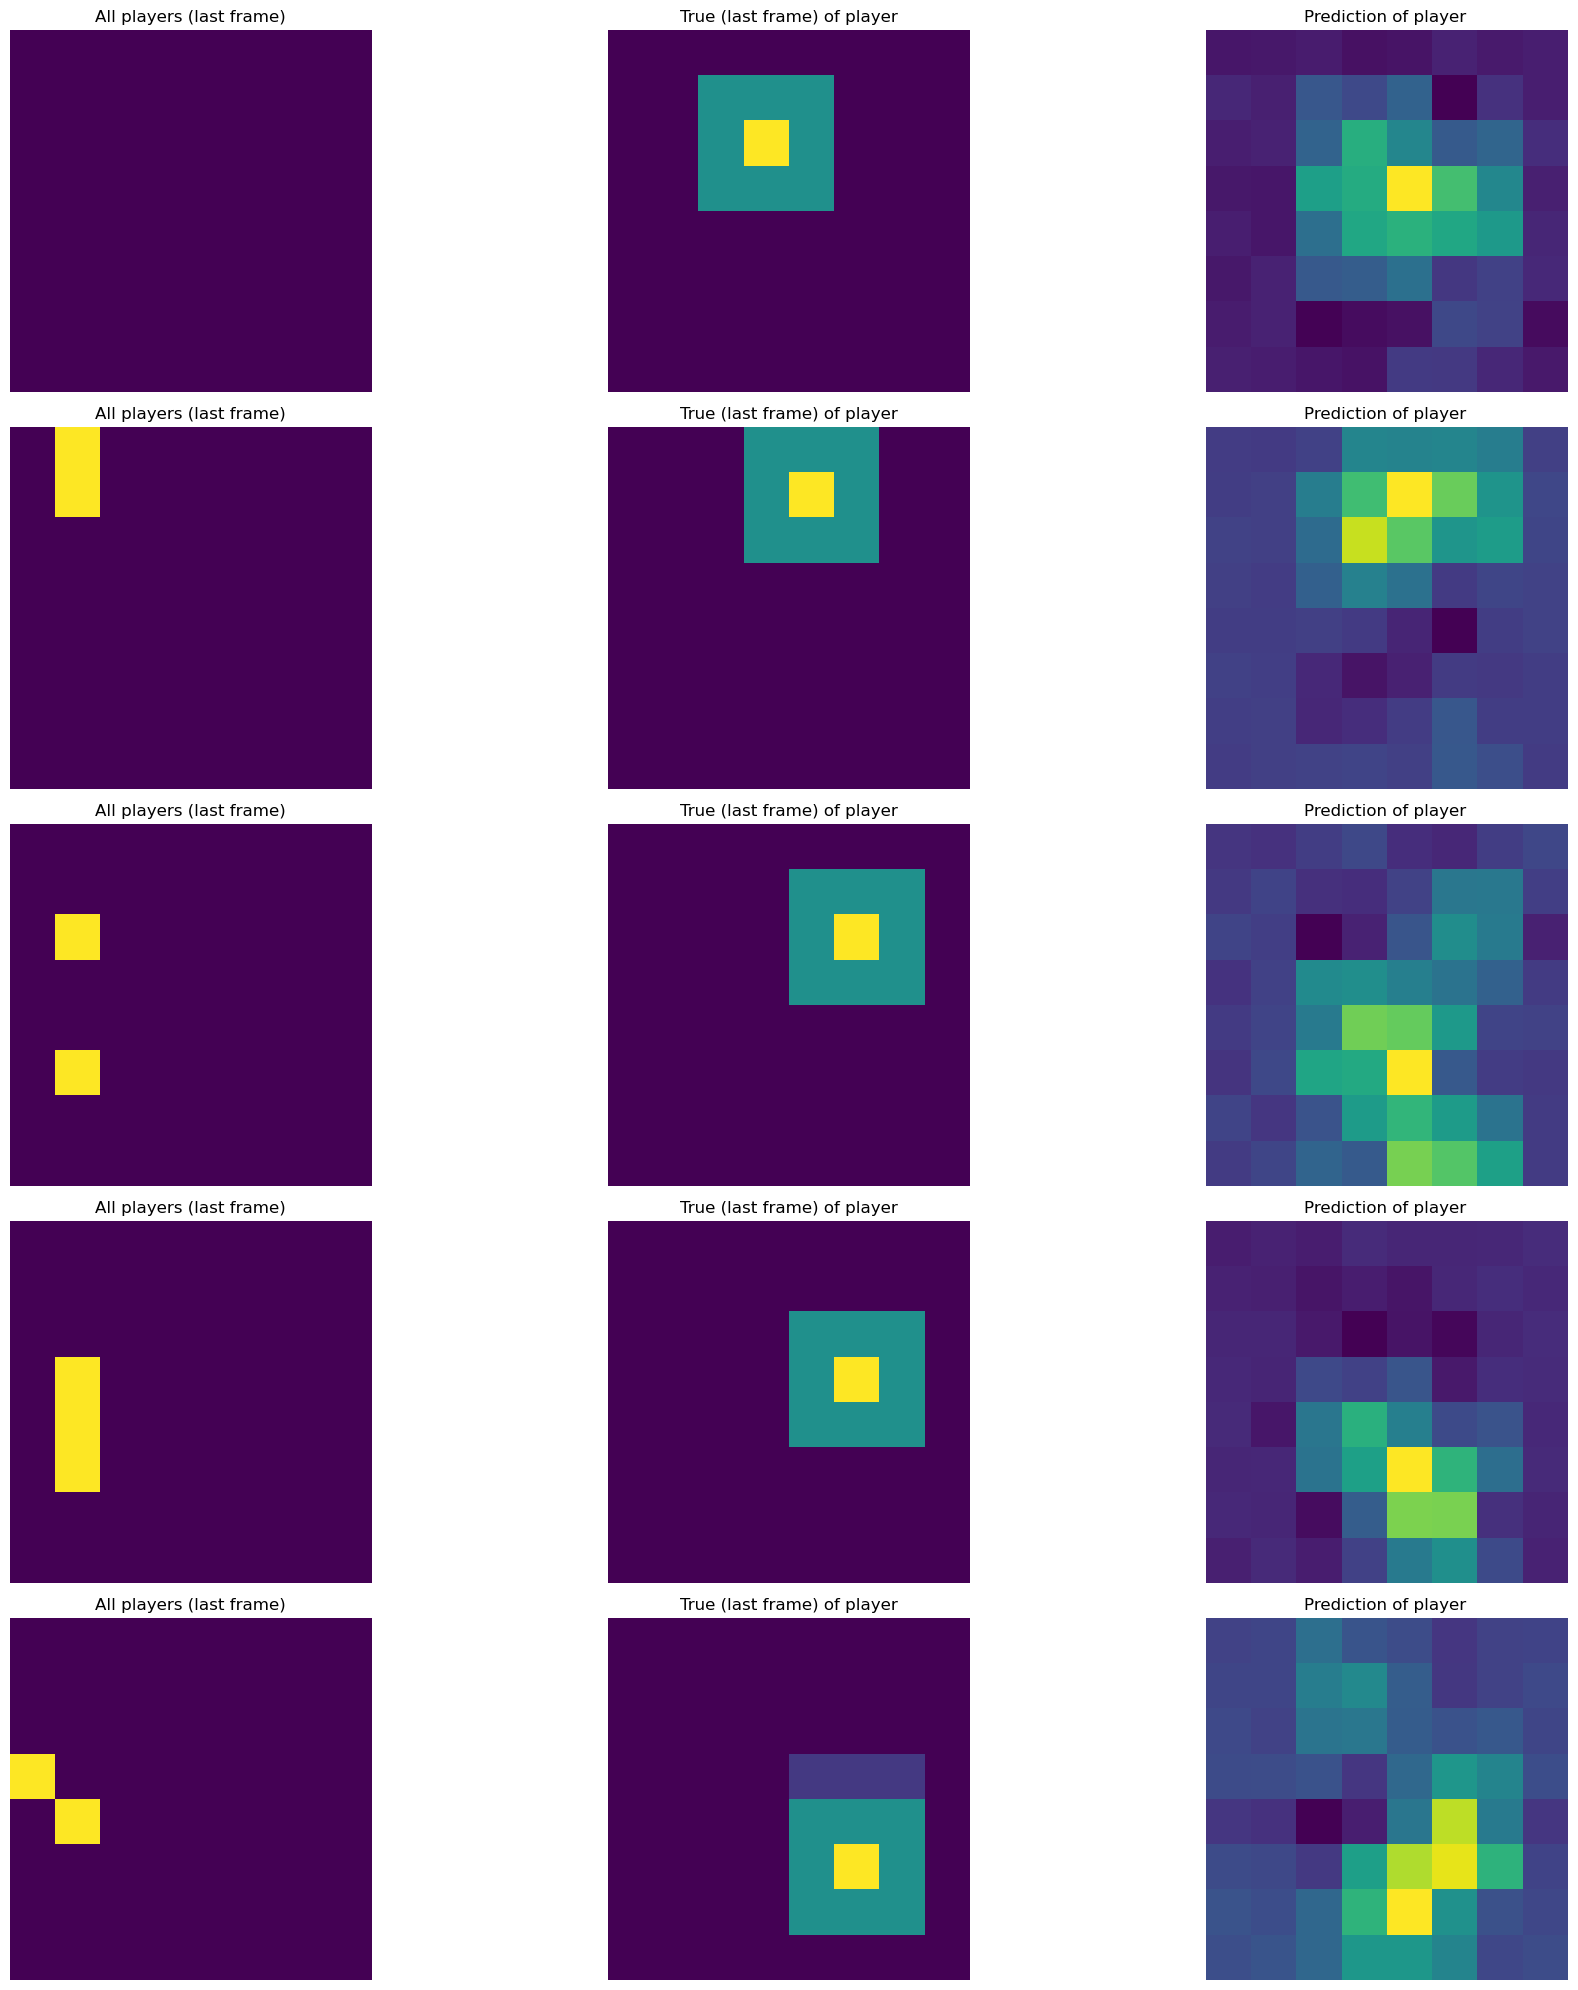

MODELO model2 - ESCENA Scene3
Epoch 1/50
12/12 [==============================] - 4s 234ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.0928 - val_loss: 0.0356 - val_mse: 0.0356 - val_mae: 0.1119
Epoch 2/50
12/12 [==============================] - 2s 162ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1044 - val_loss: 0.0344 - val_mse: 0.0344 - val_mae: 0.1097
Epoch 3/50
12/12 [==============================] - 2s 161ms/step - loss: 0.0300 - mse: 0.0300 - mae: 0.0994 - val_loss: 0.0343 - val_mse: 0.0343 - val_mae: 0.1105
Epoch 4/50
12/12 [==============================] - 2s 160ms/step - loss: 0.0275 - mse: 0.0275 - mae: 0.0951 - val_loss: 0.0341 - val_mse: 0.0341 - val_mae: 0.1016
Epoch 5/50
12/12 [==============================] - 2s 158ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.0908 - val_loss: 0.0347 - val_mse: 0.0347 - val_mae: 0.1091
Epoch 6/50
12/12 [==============================] - 2s 159ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.0846 - val_loss: 0.0348 - val_mse: 0.0348 - va

4/4 [==============================] - 1s 56ms/step


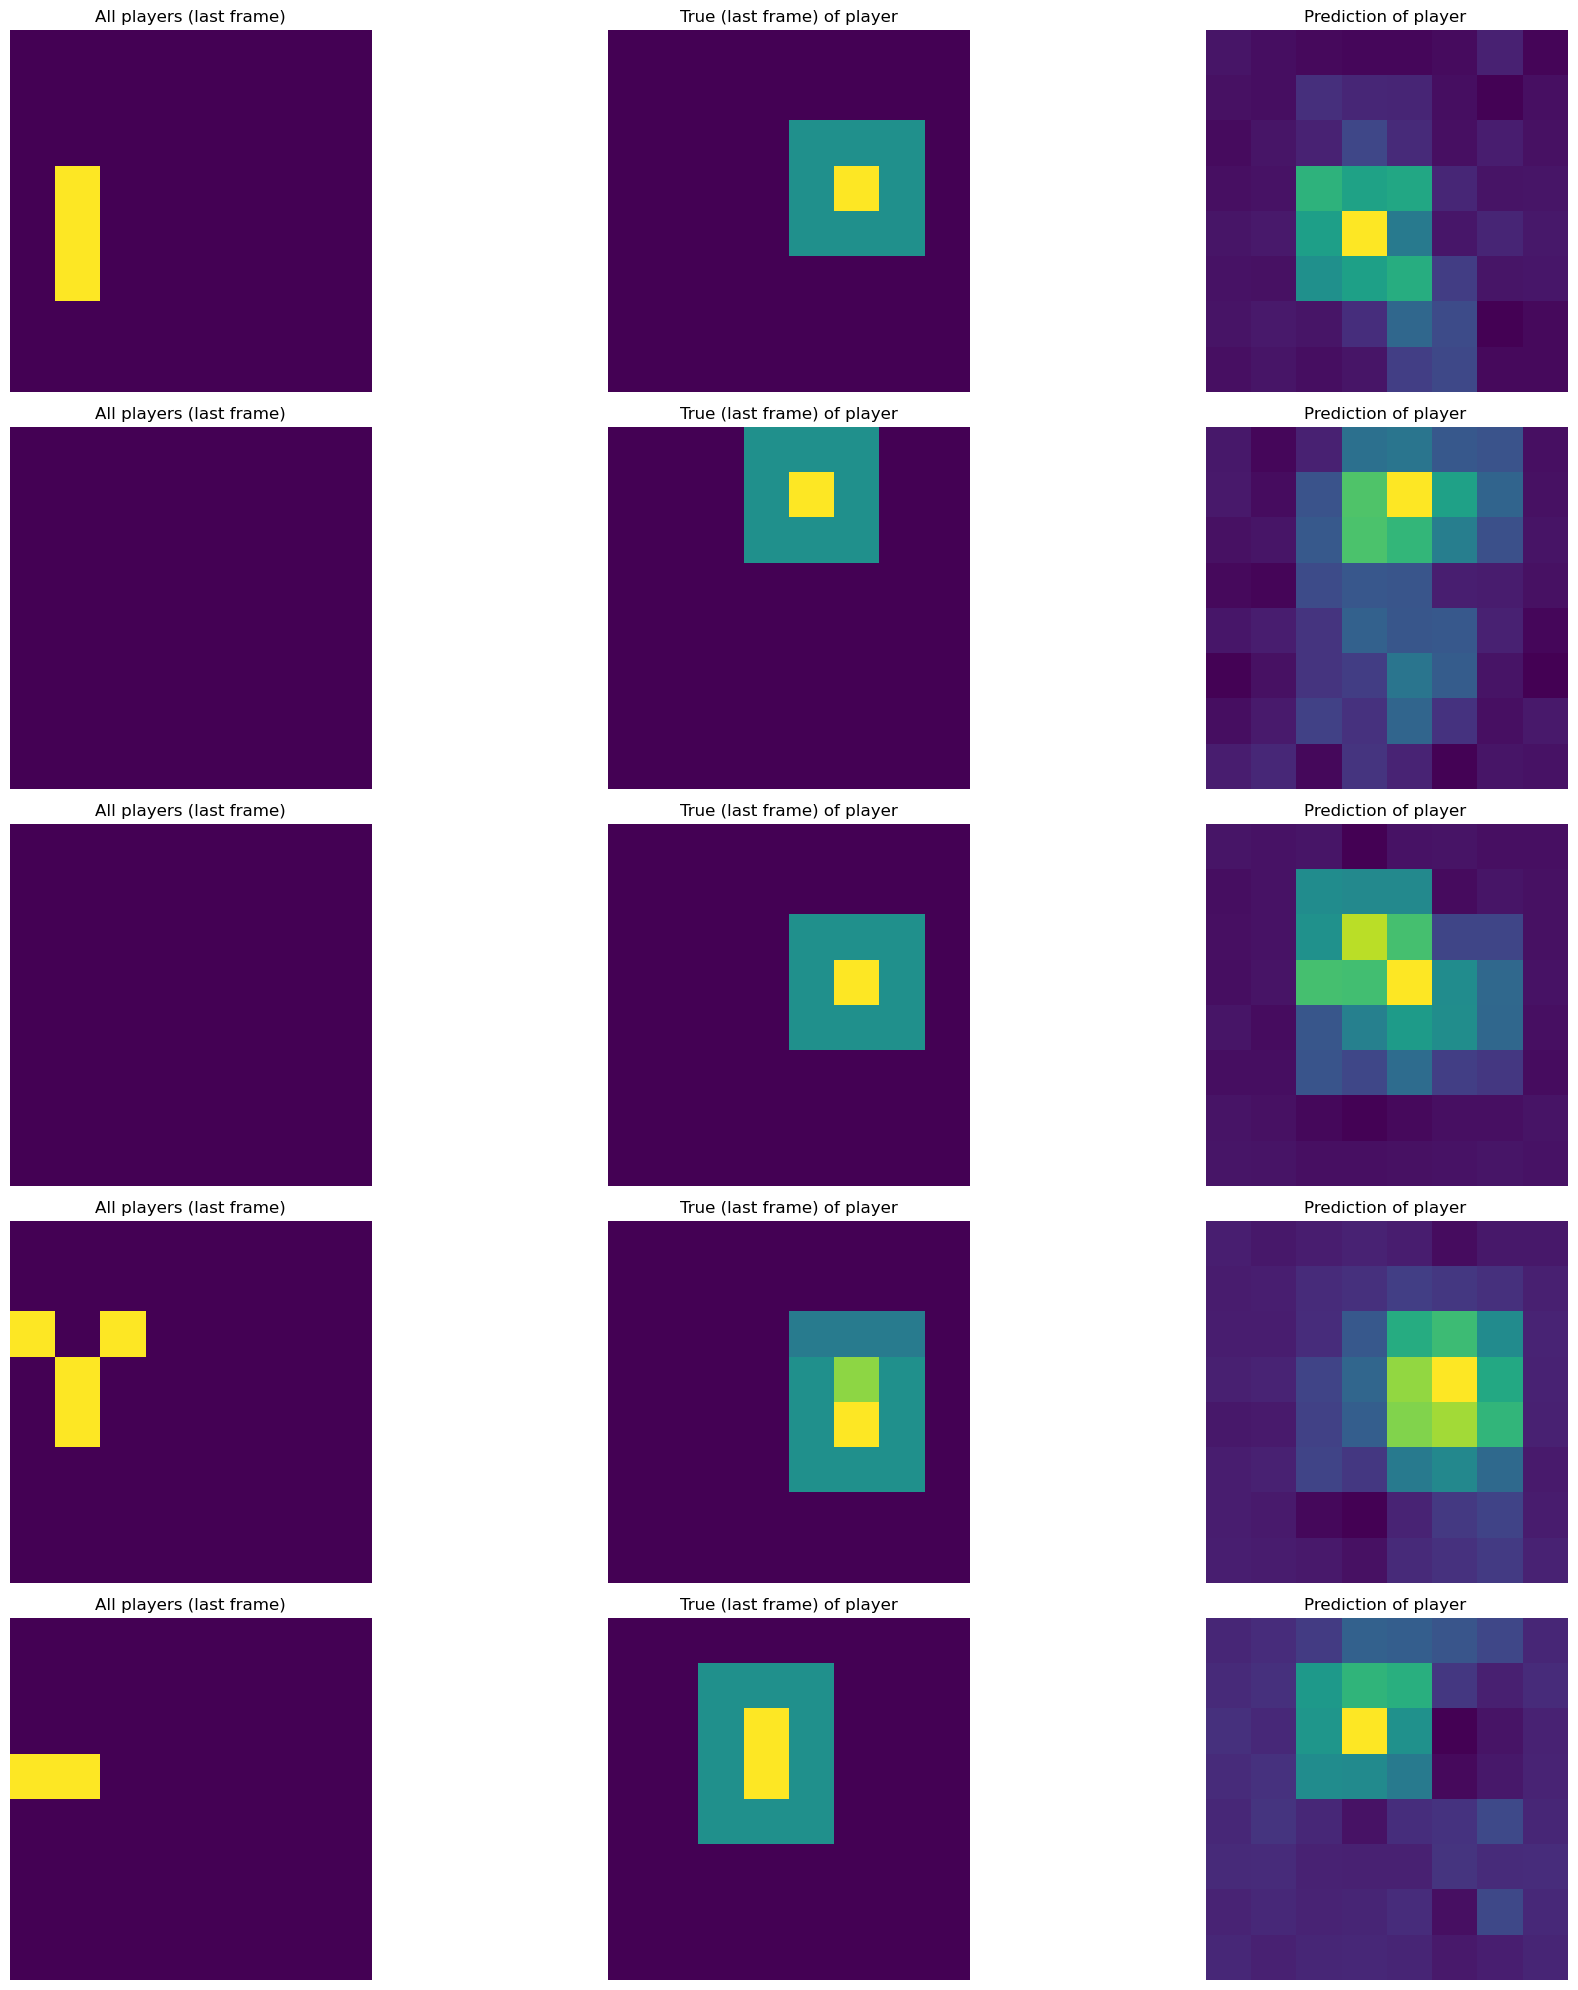

MODELO transf1 - ESCENA Scene3
Epoch 1/50
12/12 [==============================] - 21s 2s/step - loss: 0.0430 - mse: 0.0430 - mae: 0.1315 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1202
Epoch 2/50
12/12 [==============================] - 19s 2s/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1104 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1140
Epoch 3/50
12/12 [==============================] - 19s 2s/step - loss: 0.0285 - mse: 0.0285 - mae: 0.1021 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1140
Epoch 4/50
12/12 [==============================] - 19s 2s/step - loss: 0.0265 - mse: 0.0265 - mae: 0.0966 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1109
Epoch 5/50
12/12 [==============================] - 19s 2s/step - loss: 0.0242 - mse: 0.0242 - mae: 0.0914 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1138
Epoch 6/50
12/12 [==============================] - 19s 2s/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0848 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.11

4/4 [==============================] - 4s 842ms/step


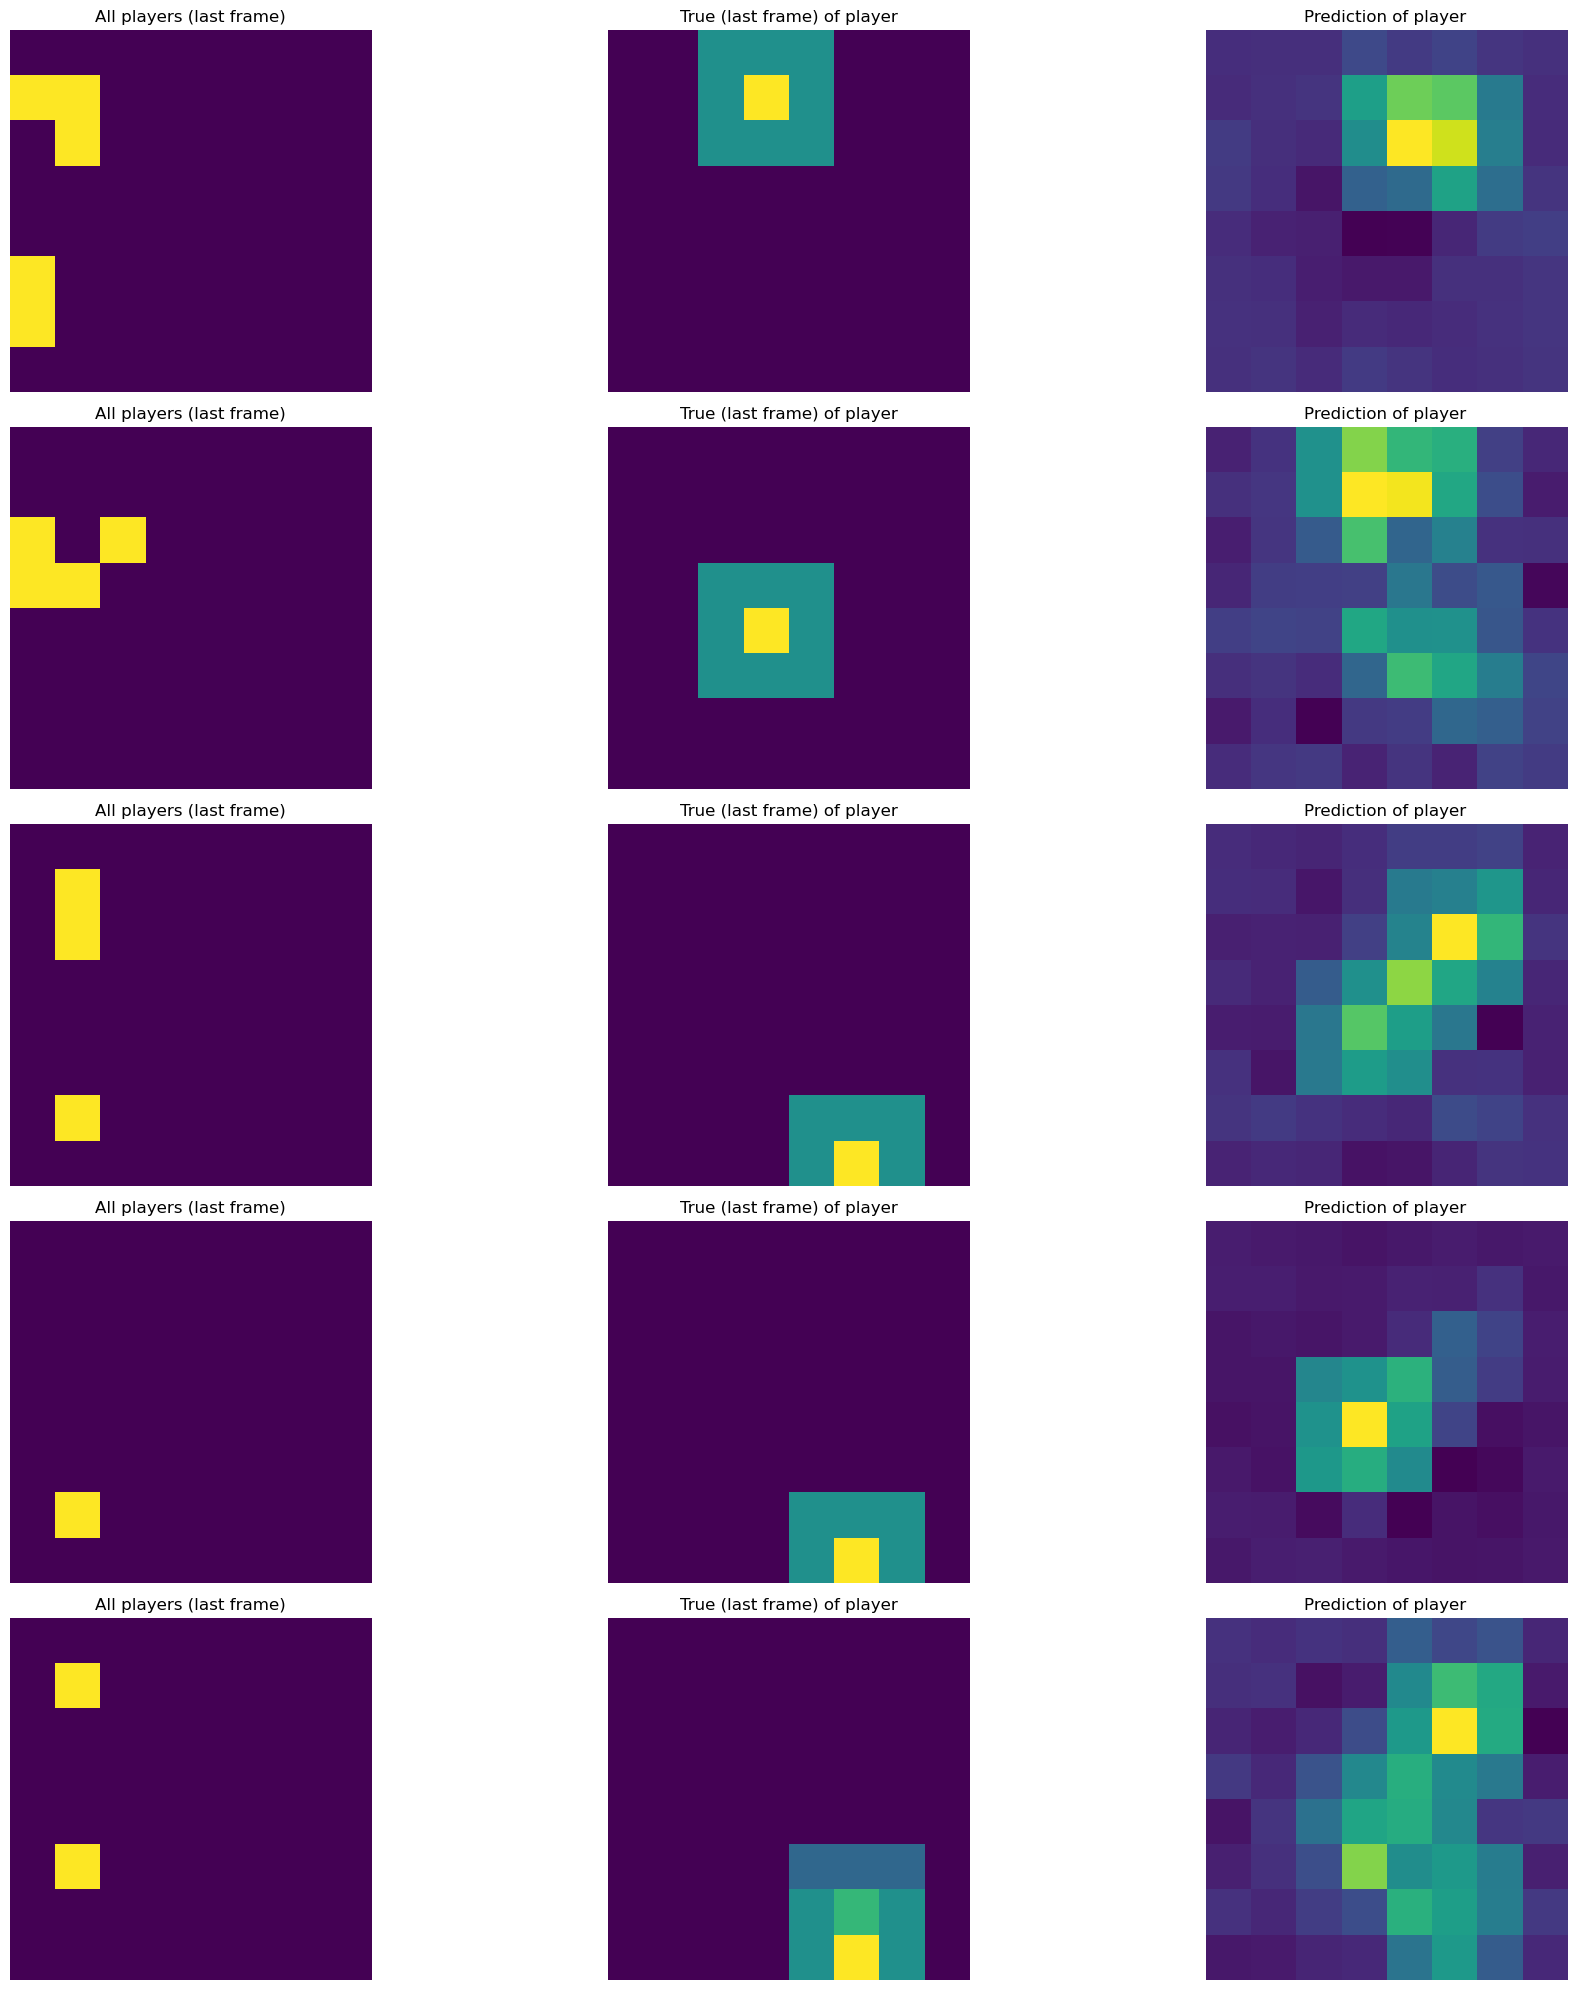

Resultados por escena:
Escena Scene1:
Modelo model0 - MSE: 0.0388, MAE: 0.1054, Tiempo: 24.41s
Modelo model1 - MSE: 0.0509, MAE: 0.1239, Tiempo: 14.42s
Modelo model2 - MSE: 0.0497, MAE: 0.1200, Tiempo: 30.82s
Modelo transf1 - MSE: 0.0395, MAE: 0.1037, Tiempo: 506.12s

Escena Scene2:
Modelo model0 - MSE: 0.0352, MAE: 0.1035, Tiempo: 47.30s
Modelo model1 - MSE: 0.0480, MAE: 0.1219, Tiempo: 44.06s
Modelo model2 - MSE: 0.0492, MAE: 0.1184, Tiempo: 80.04s
Modelo transf1 - MSE: 0.0460, MAE: 0.1104, Tiempo: 719.49s

Escena Scene3:
Modelo model0 - MSE: 0.0433, MAE: 0.1120, Tiempo: 109.75s
Modelo model1 - MSE: 0.0463, MAE: 0.1225, Tiempo: 59.31s
Modelo model2 - MSE: 0.0471, MAE: 0.1167, Tiempo: 99.31s
Modelo transf1 - MSE: 0.0498, MAE: 0.1196, Tiempo: 967.97s

RESUMEN RESULTADOS:
Modelo model0:
Tiempo de ejecución total: 181.46 segundos
MSE promedio: 0.0391
MAE promedio: 0.1070

BCE promedio: 0.3351

Modelo model1:
Tiempo de ejecución total: 117.79 segundos
MSE promedio: 0.0484
MAE promedio: 0.

In [17]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

# Assuming you have a function to calculate binary cross-entropy (log loss)
def binary_cross_entropy(y_true, y_pred):
    """
    Calcula la Binary Cross-Entropy (BCE) asegurando que y_true y y_pred sean válidos.
    Soporta etiquetas no binarias (soft labels).
    """
    # Asegurar que los valores de y_pred estén entre 0 y 1
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Asegurar que los valores de y_true estén en el rango [0,1]
    y_true = np.clip(y_true, 0, 1)

    # Fórmula BCE: -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    bce = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return np.mean(bce)

np.random.seed(42)

# Lista de identificadores de modelo
model_ids = ["model0","model1","model2","transf1"] 


# Estructuras para almacenar resultados y tiempos de ejecución
mse_results = {model_id: [] for model_id in model_ids}
bce_results = {model_id: [] for model_id in model_ids} #binary cross entropy
mae_results = {model_id: [] for model_id in model_ids}
training_times = {model_id: [] for model_id in model_ids}
total_execution_time = {model_id: 0 for model_id in model_ids}

print(np.unique(S))

escenas_seleccionadas=np.unique(S)
#escenas_seleccionadas=escenas_seleccionadas[3:]
print("Para esta ejecución se han seleccionada las escenas: ")
print(escenas_seleccionadas)

for ixs, sc in enumerate(escenas_seleccionadas):
    # Índices para entrenamiento y prueba
    train_indices = np.where(S != sc)[0]
    test_indices = np.where(S == sc)[0]
    np.random.shuffle(train_indices)

    XYT_train = XYT[train_indices]
    rssiT_train = rssiT[train_indices]
    YT_train = YT[train_indices]

    XYT_test = XYT[test_indices]
    rssiT_test = rssiT[test_indices]
    YT_test = YT[test_indices]
    
    for model_id in model_ids:
        print(f"MODELO {model_id} - ESCENA {sc}")
        
        model = load_model(f"{model_id}.h5")

        start_time = time.time()

        history = model.fit([XYT_train, rssiT_train], YT_train,
                                  batch_size=16,
                                  validation_data=([XYT_test, rssiT_test], YT_test),
                                  epochs=50)
        end_time = time.time()
        training_time = end_time - start_time
        
        YT_prediction = model.predict([XYT_test, rssiT_test])

        plottingRandom(XYT_test, YT_test, YT_prediction)

        mse = mean_squared_error(YT_test.flatten(), YT_prediction.flatten())
        mae = mean_absolute_error(YT_test.flatten(), YT_prediction.flatten())
        bce = binary_cross_entropy(YT_test.flatten(), YT_prediction.flatten())

        mse_results[model_id].append(mse)
        mae_results[model_id].append(mae)
        bce_results[model_id].append(bce)
        
       
        training_times[model_id].append(training_time)
        total_execution_time[model_id] += training_time

# Calculando promedios y mostrando resultados

print("Resultados por escena:")
for i, sc in enumerate(escenas_seleccionadas):
    print(f"Escena {sc}:")
    for model_id in model_ids:
        print(f"Modelo {model_id} - MSE: {mse_results[model_id][i]:.4f}, MAE: {mae_results[model_id][i]:.4f}, Tiempo: {training_times[model_id][i]:.2f}s")
    print("")
    
print("RESUMEN RESULTADOS:")
for model_id in model_ids:
    average_mse = np.mean(mse_results[model_id])
    average_mae = np.mean(mae_results[model_id])
    average_bce = np.mean(bce_results[model_id])
    print(f"Modelo {model_id}:")
    print(f"Tiempo de ejecución total: {total_execution_time[model_id]:.2f} segundos")
    print(f"MSE promedio: {average_mse:.4f}")
    print(f"MAE promedio: {average_mae:.4f}\n")
    print(f"BCE promedio: {average_bce:.4f}\n")


In [18]:
ts.sort()
print(ts)

[1710618640, 1710618641, 1710618642, 1710618643, 1710618644, 1710618645, 1710618646, 1710618647, 1710618648, 1710618649, 1710618650, 1710618651, 1710618652, 1710618653, 1710618654, 1710618655, 1710618656, 1710618657, 1710618658, 1710618659, 1710618660, 1710618661, 1710618662, 1710618663, 1710618664, 1710618665, 1710618666, 1710618667, 1710618668, 1710618669, 1710618670, 1710618671, 1710618672, 1710618673, 1710618674, 1710618675, 1710618676, 1710618677, 1710618678, 1710618679, 1710618680, 1710618681, 1710618682, 1710618683, 1710618684, 1710618685, 1710618686, 1710618687, 1710618688, 1710618689, 1710618690, 1710618691, 1710618692, 1710618693, 1710618694, 1710618695, 1710618696, 1710618697, 1710618698, 1710618699, 1710618700, 1710618701, 1710618702, 1710618703, 1710618704, 1710618705, 1710618706, 1710618707, 1710618708, 1710618709, 1710618710, 1710618711, 1710618712, 1710618713, 1710618714, 1710618715, 1710618716, 1710618717, 1710618718, 1710618719, 1710618720, 1710618721, 1710618722, 171